In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Bakery sales Data Analysis

In [2]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [3]:
df_sales = pd.read_csv('/content/drive/MyDrive/NICD assessment/bakery_sales_2021-2022.csv')

The sales dataset comprises approximately 23,000 records, while the weather dataset includes about 600 records, covering the period from January 1, 2021, to October 31, 2022. These datasets were merged based on the 'date' column using an inner join.

Daily sales statistics include total sales (total), quantity of items sold (Quantity), and number of unique articles sold (Article).

In [4]:
# Display the count of null values for each column
null_counts = df_sales.isnull().sum()
print("Count of null values in each column:")
print(null_counts)

Count of null values in each column:
Unnamed: 0       0
date             0
time             0
ticket_number    0
Article          0
Quantity         0
UNIT_PRICE       0
dtype: int64


In [5]:
# Display the count of NA values for each column
na_counts = df_sales.isna().sum()
print("Count of NA values in each column:")
print(na_counts)

Count of NA values in each column:
Unnamed: 0       0
date             0
time             0
ticket_number    0
Article          0
Quantity         0
UNIT_PRICE       0
dtype: int64


In [6]:
df_sales.head()

Unnamed: 0        date   time  ticket_number               Article  \
0           0  2021-01-02  08:38       150040.0              BAGUETTE   
1           1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2           4  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3           5  2021-01-02  09:14       150041.0                  PAIN   
4           8  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   

   Quantity UNIT_PRICE  
0       1.0     0,90 €  
1       3.0     1,20 €  
2       2.0     1,20 €  
3       1.0     1,15 €  
4       5.0     1,20 €

In [7]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   Article        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   UNIT_PRICE     234005 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


In [8]:
df_sales.describe()

Unnamed: 0  ticket_number       Quantity
count  234005.000000  234005.000000  234005.000000
mean   255205.035854  219201.258738       1.538377
std    147501.625992   40053.223896       1.289603
min         0.000000  150040.000000    -200.000000
25%    127979.000000  184754.000000       1.000000
50%    254573.000000  218807.000000       1.000000
75%    382911.000000  253927.000000       2.000000
max    511395.000000  288913.000000     200.000000

In [9]:
#dropping firs column
df_sales = df_sales.drop(df_sales.columns[0], axis=1)

In [10]:
#converting unit_price to float
df_sales['UNIT_PRICE'] = df_sales['UNIT_PRICE'].str.replace(' €', '')
df_sales['UNIT_PRICE'] = df_sales['UNIT_PRICE'].str.replace(',', '.')
df_sales['UNIT_PRICE'] = df_sales['UNIT_PRICE'].astype(float)

#converting date to datetime
df_sales['date'] = pd.to_datetime(df_sales['date'])

#converting time to datetime
df_sales['time'] = pd.to_datetime(df_sales['time'], format="%H:%M")

In [11]:
df_sales

date                time  ticket_number               Article  \
0      2021-01-02 1900-01-01 08:38:00       150040.0              BAGUETTE   
1      2021-01-02 1900-01-01 08:38:00       150040.0      PAIN AU CHOCOLAT   
2      2021-01-02 1900-01-01 09:14:00       150041.0      PAIN AU CHOCOLAT   
3      2021-01-02 1900-01-01 09:14:00       150041.0                  PAIN   
4      2021-01-02 1900-01-01 09:25:00       150042.0  TRADITIONAL BAGUETTE   
...           ...                 ...            ...                   ...   
234000 2022-09-30 1900-01-01 18:52:00       288911.0                 COUPE   
234001 2022-09-30 1900-01-01 18:52:00       288911.0            BOULE 200G   
234002 2022-09-30 1900-01-01 18:52:00       288911.0                 COUPE   
234003 2022-09-30 1900-01-01 18:55:00       288912.0  TRADITIONAL BAGUETTE   
234004 2022-09-30 1900-01-01 18:56:00       288913.0  TRADITIONAL BAGUETTE   

        Quantity  UNIT_PRICE  
0            1.0        0.90  
1            3.0        1.20  
2            2.0        1.20  
3            1.0        1.15  
4            5.0        1.20  
...          ...         ...  
234000       1.0        0.15  
234001       1.0        1.20  
234002       2.0        0.15  
234003       1.0        1.30  
234004       1.0        1.30  

[234005 rows x 6 columns]

In [12]:
# Remove rows where 'Article' is "."
df_filtered_article = df_sales[df_sales['Article'] != "."]

In [13]:
df_filtered_article.shape

(234000, 6)

In [14]:
df_filtered_article

date                time  ticket_number               Article  \
0      2021-01-02 1900-01-01 08:38:00       150040.0              BAGUETTE   
1      2021-01-02 1900-01-01 08:38:00       150040.0      PAIN AU CHOCOLAT   
2      2021-01-02 1900-01-01 09:14:00       150041.0      PAIN AU CHOCOLAT   
3      2021-01-02 1900-01-01 09:14:00       150041.0                  PAIN   
4      2021-01-02 1900-01-01 09:25:00       150042.0  TRADITIONAL BAGUETTE   
...           ...                 ...            ...                   ...   
234000 2022-09-30 1900-01-01 18:52:00       288911.0                 COUPE   
234001 2022-09-30 1900-01-01 18:52:00       288911.0            BOULE 200G   
234002 2022-09-30 1900-01-01 18:52:00       288911.0                 COUPE   
234003 2022-09-30 1900-01-01 18:55:00       288912.0  TRADITIONAL BAGUETTE   
234004 2022-09-30 1900-01-01 18:56:00       288913.0  TRADITIONAL BAGUETTE   

        Quantity  UNIT_PRICE  
0            1.0        0.90  
1            3.0        1.20  
2            2.0        1.20  
3            1.0        1.15  
4            5.0        1.20  
...          ...         ...  
234000       1.0        0.15  
234001       1.0        1.20  
234002       2.0        0.15  
234003       1.0        1.30  
234004       1.0        1.30  

[234000 rows x 6 columns]

In [15]:
# Remove rows where 'Article' is "." and quantities are negative
df_filtered_quantity = df_filtered_article[ (df_filtered_article['Quantity'] >= 0)]


In [16]:
df_filtered_quantity.shape

(232705, 6)

In [17]:
# Count the number of unique ticket numbers
total_orders = df_filtered_quantity['ticket_number'].nunique()
total_orders

135686

In [18]:
df_filtered_quantity

date                time  ticket_number               Article  \
0      2021-01-02 1900-01-01 08:38:00       150040.0              BAGUETTE   
1      2021-01-02 1900-01-01 08:38:00       150040.0      PAIN AU CHOCOLAT   
2      2021-01-02 1900-01-01 09:14:00       150041.0      PAIN AU CHOCOLAT   
3      2021-01-02 1900-01-01 09:14:00       150041.0                  PAIN   
4      2021-01-02 1900-01-01 09:25:00       150042.0  TRADITIONAL BAGUETTE   
...           ...                 ...            ...                   ...   
234000 2022-09-30 1900-01-01 18:52:00       288911.0                 COUPE   
234001 2022-09-30 1900-01-01 18:52:00       288911.0            BOULE 200G   
234002 2022-09-30 1900-01-01 18:52:00       288911.0                 COUPE   
234003 2022-09-30 1900-01-01 18:55:00       288912.0  TRADITIONAL BAGUETTE   
234004 2022-09-30 1900-01-01 18:56:00       288913.0  TRADITIONAL BAGUETTE   

        Quantity  UNIT_PRICE  
0            1.0        0.90  
1            3.0        1.20  
2            2.0        1.20  
3            1.0        1.15  
4            5.0        1.20  
...          ...         ...  
234000       1.0        0.15  
234001       1.0        1.20  
234002       2.0        0.15  
234003       1.0        1.30  
234004       1.0        1.30  

[232705 rows x 6 columns]

In [19]:
#data time period
print('Start Date:', df_filtered_quantity['date'].min(), 'End Date:', df_filtered_quantity['date'].max(), sep = '\n\n')

Start Date:

2021-01-02 00:00:00

End Date:

2022-09-30 00:00:00


In [20]:
#searching negative values
df_filtered_quantity[(df_filtered_quantity['UNIT_PRICE'] < 0) | (df_filtered_quantity['Quantity'] < 0)].count()

date             0
time             0
ticket_number    0
Article          0
Quantity         0
UNIT_PRICE       0
dtype: int64

In [21]:
#creating new column with order prices for unit
df_filtered_quantity['total'] = df_filtered_quantity['Quantity'] * df_filtered_quantity['UNIT_PRICE']

#creating new column with working hours
df_filtered_quantity['hour'] = df_filtered_quantity['time'].dt.hour

#creating new column with day of week
df_filtered_quantity['day_of_week'] = df_filtered_quantity['date'].dt.dayofweek

<ipython-input-21-46c6f9dd41f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_quantity['total'] = df_filtered_quantity['Quantity'] * df_filtered_quantity['UNIT_PRICE']
<ipython-input-21-46c6f9dd41f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_quantity['hour'] = df_filtered_quantity['time'].dt.hour
<ipython-input-21-46c6f9dd41f1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [22]:
df_filtered_quantity

date                time  ticket_number               Article  \
0      2021-01-02 1900-01-01 08:38:00       150040.0              BAGUETTE   
1      2021-01-02 1900-01-01 08:38:00       150040.0      PAIN AU CHOCOLAT   
2      2021-01-02 1900-01-01 09:14:00       150041.0      PAIN AU CHOCOLAT   
3      2021-01-02 1900-01-01 09:14:00       150041.0                  PAIN   
4      2021-01-02 1900-01-01 09:25:00       150042.0  TRADITIONAL BAGUETTE   
...           ...                 ...            ...                   ...   
234000 2022-09-30 1900-01-01 18:52:00       288911.0                 COUPE   
234001 2022-09-30 1900-01-01 18:52:00       288911.0            BOULE 200G   
234002 2022-09-30 1900-01-01 18:52:00       288911.0                 COUPE   
234003 2022-09-30 1900-01-01 18:55:00       288912.0  TRADITIONAL BAGUETTE   
234004 2022-09-30 1900-01-01 18:56:00       288913.0  TRADITIONAL BAGUETTE   

        Quantity  UNIT_PRICE  total  hour  day_of_week  
0            1.0        0.90   0.90     8            5  
1            3.0        1.20   3.60     8            5  
2            2.0        1.20   2.40     9            5  
3            1.0        1.15   1.15     9            5  
4            5.0        1.20   6.00     9            5  
...          ...         ...    ...   ...          ...  
234000       1.0        0.15   0.15    18            4  
234001       1.0        1.20   1.20    18            4  
234002       2.0        0.15   0.30    18            4  
234003       1.0        1.30   1.30    18            4  
234004       1.0        1.30   1.30    18            4  

[232705 rows x 9 columns]

In [23]:
df_filtered_quantity["UNIT_PRICE"].max()

60.0

In [24]:
#the most expensive unit
print('Most expensive unit:',df_filtered_quantity[df_filtered_quantity['UNIT_PRICE'] == df_filtered_quantity['UNIT_PRICE'].max()]['Article'], sep = '\n\n')

Most expensive unit:

201294    DIVERS PATISSERIE
Name: Article, dtype: object


In [25]:
#units in bakery
print('Articles:',df_filtered_quantity['Article'].unique(), 'Number of Articles:',df_filtered_quantity['Article'].nunique(), sep = '\n\n')

Articles:

['BAGUETTE' 'PAIN AU CHOCOLAT' 'PAIN' 'TRADITIONAL BAGUETTE' 'CROISSANT'
 'BANETTE' 'BANETTINE' 'SPECIAL BREAD' 'COUPE' 'SAND JB EMMENTAL'
 'KOUIGN AMANN' 'BOULE 200G' 'BOULE 400G' 'GAL FRANGIPANE 6P' 'CAMPAGNE'
 'MOISSON' 'CAFE OU EAU' 'BRIOCHE' 'CEREAL BAGUETTE' 'SEIGLE' 'COMPLET'
 'DIVERS PATISSERIE' 'GAL FRANGIPANE 4P' 'COOKIE' 'FICELLE'
 'PAIN AUX RAISINS' 'GAL POMME 6P' 'GAL POMME 4P' 'FINANCIER X5'
 'VIK BREAD' 'DIVERS VIENNOISERIE' 'GACHE' 'SANDWICH COMPLET'
 'PAIN BANETTE' 'GRAND FAR BRETON' 'QUIM BREAD' 'SPECIAL BREAD KG'
 'GD KOUIGN AMANN' 'BOULE POLKA' 'DEMI BAGUETTE' 'CHAUSSON AUX POMMES'
 'BAGUETTE GRAINE' 'DIVERS CONFISERIE' 'SUCETTE' 'DIVERS BOULANGERIE'
 'BOISSON 33CL' 'PATES' 'FORMULE SANDWICH' 'DIVERS SANDWICHS'
 'CROISSANT AMANDES' 'PAIN CHOCO AMANDES' 'SACHET VIENNOISERIE' 'NANTAIS'
 'CHOCOLAT' 'PAIN S/SEL' 'FONDANT CHOCOLAT' 'GAL POIRE CHOCO 6P'
 'GAL POIRE CHOCO 4P' 'GALETTE 8 PERS' 'SAND JB' 'SACHET DE CROUTON'
 'GRANDE SUCETTE' 'DEMI PAIN' 'TARTELETT

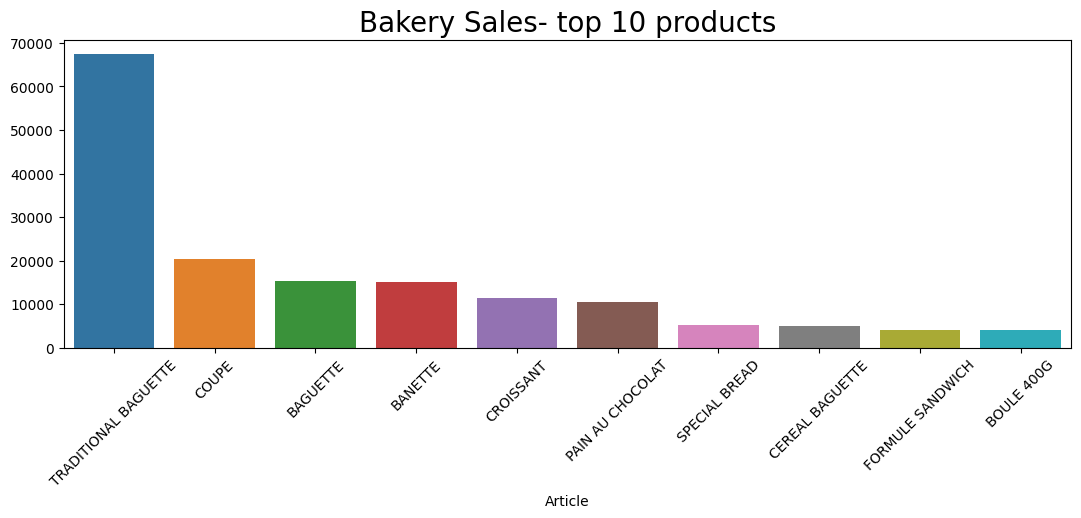

In [26]:
top_10_products = pd.DataFrame([df_filtered_quantity["Article"].value_counts().head(10)])

plt.figure(figsize=(13, 4))
sns.barplot(data=top_10_products)
plt.title('Bakery Sales- top 10 products', fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [27]:
#creating a table of daily sales
daily_sales = df_filtered_quantity.groupby('date').agg({'total':'sum'}).reset_index()
daily_sales.head()

date    total
0 2021-01-02   987.85
1 2021-01-03  1015.20
2 2021-01-04   461.90
3 2021-01-05   526.10
4 2021-01-07   544.00

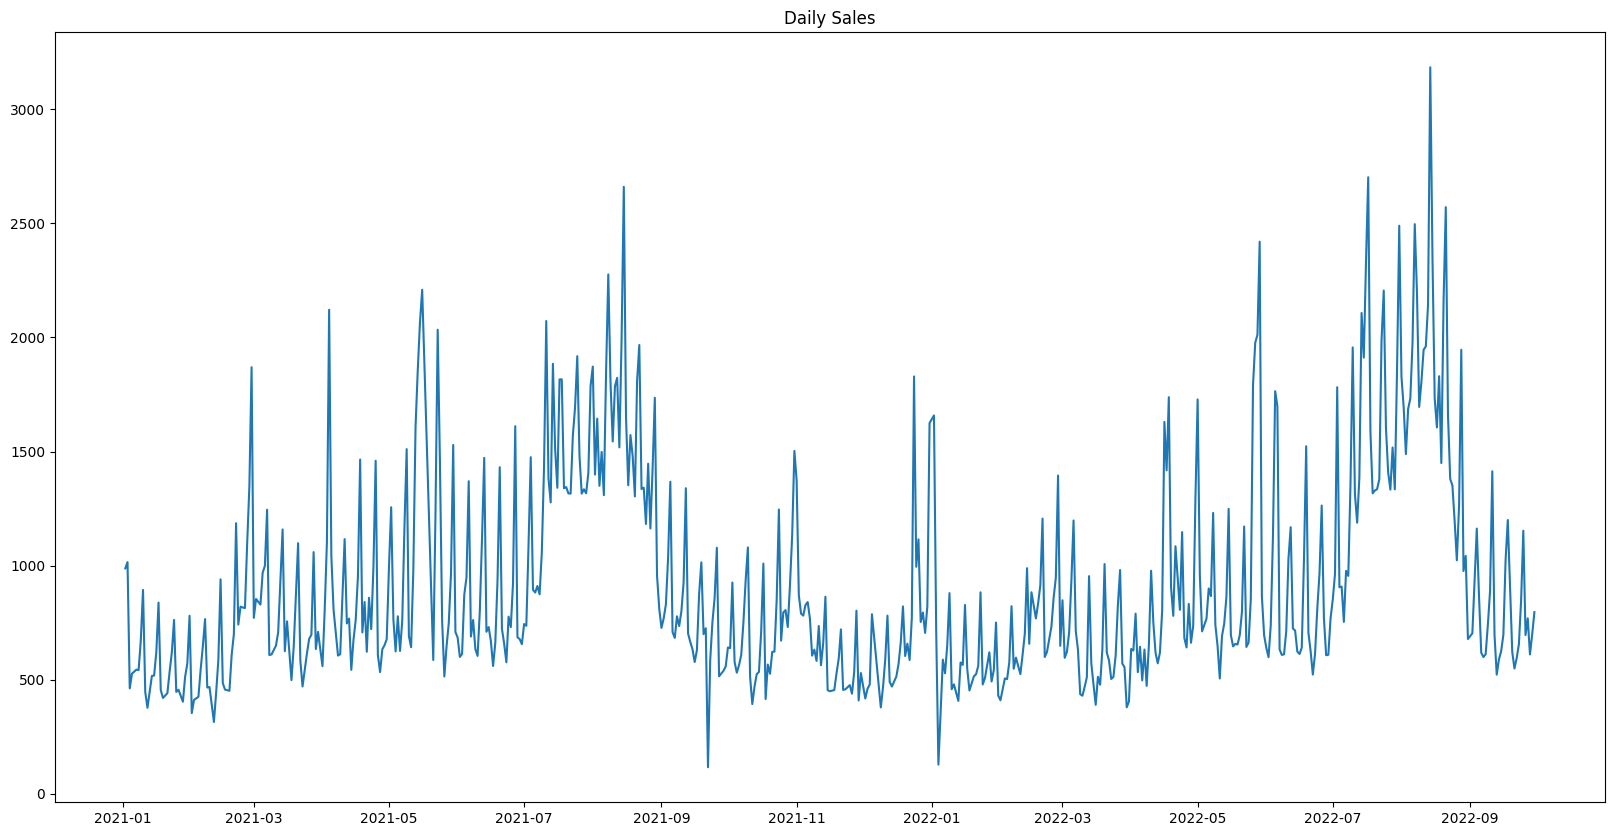

In [28]:
#creating a daily sales plot
fig, ax = plt.subplots()

ax.plot(daily_sales['date'], daily_sales['total'])
ax.set_title('Daily Sales')

fig.set_figwidth(20)
fig.set_figheight(10)

In [29]:
#set date as index
daily_sales.set_index('date', inplace = True)

In [30]:
#creating a table of weekly sales
weekly_sales = daily_sales.resample('W').sum()

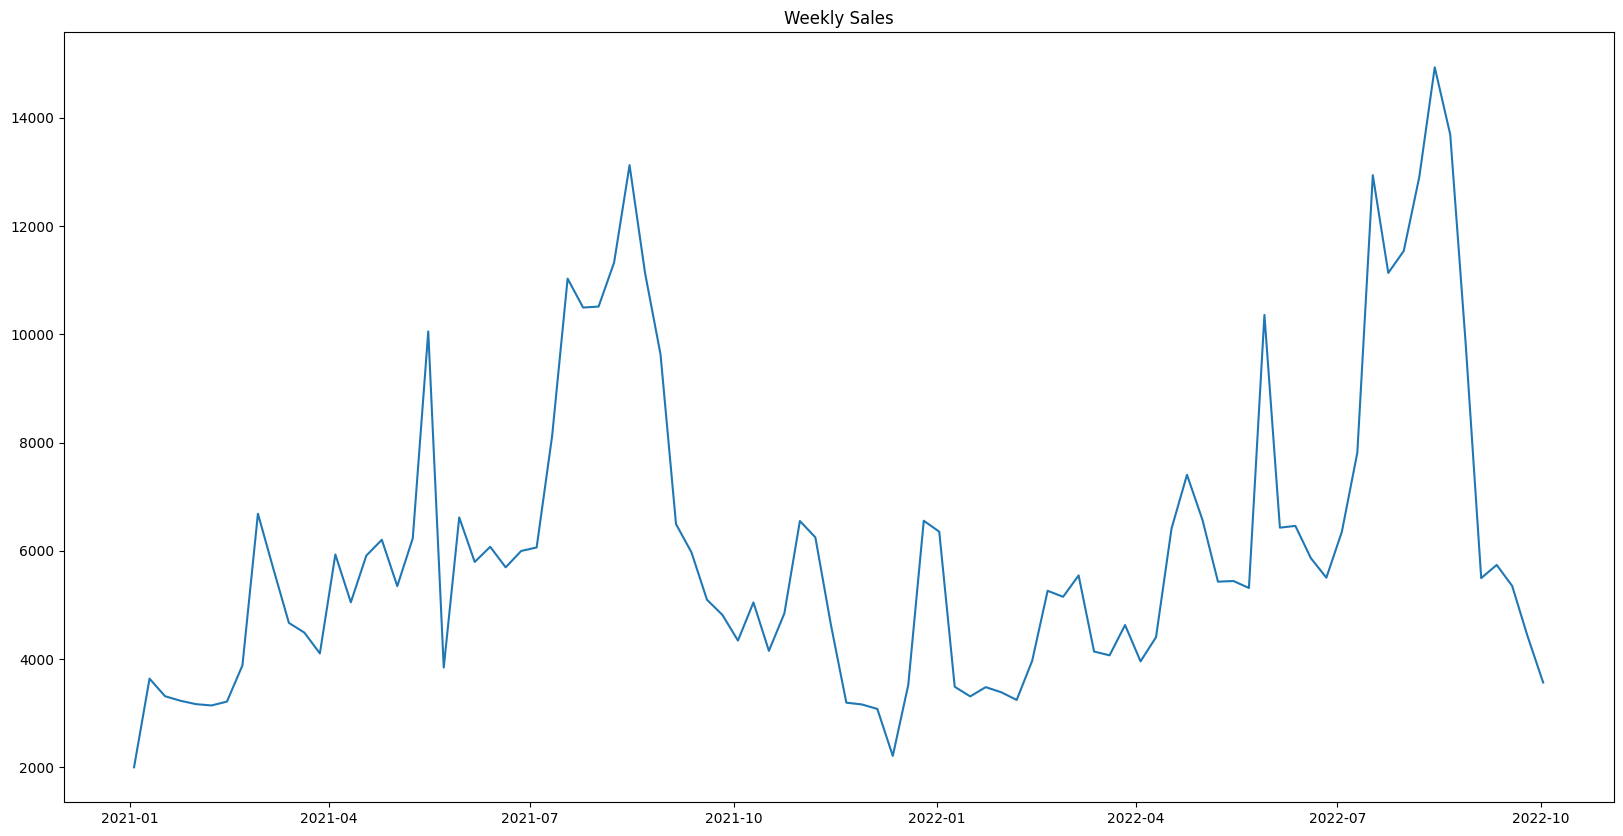

In [31]:
#creating a weekly sales plot
fig, ax = plt.subplots()

ax.plot(weekly_sales.index, weekly_sales['total'])

ax.set_title('Weekly Sales')


fig.set_figwidth(20)
fig.set_figheight(10)

In [32]:
prices = df_filtered_quantity.groupby('Article').agg({'UNIT_PRICE':'max'}).sort_values(by = 'UNIT_PRICE', ascending = True).reset_index()

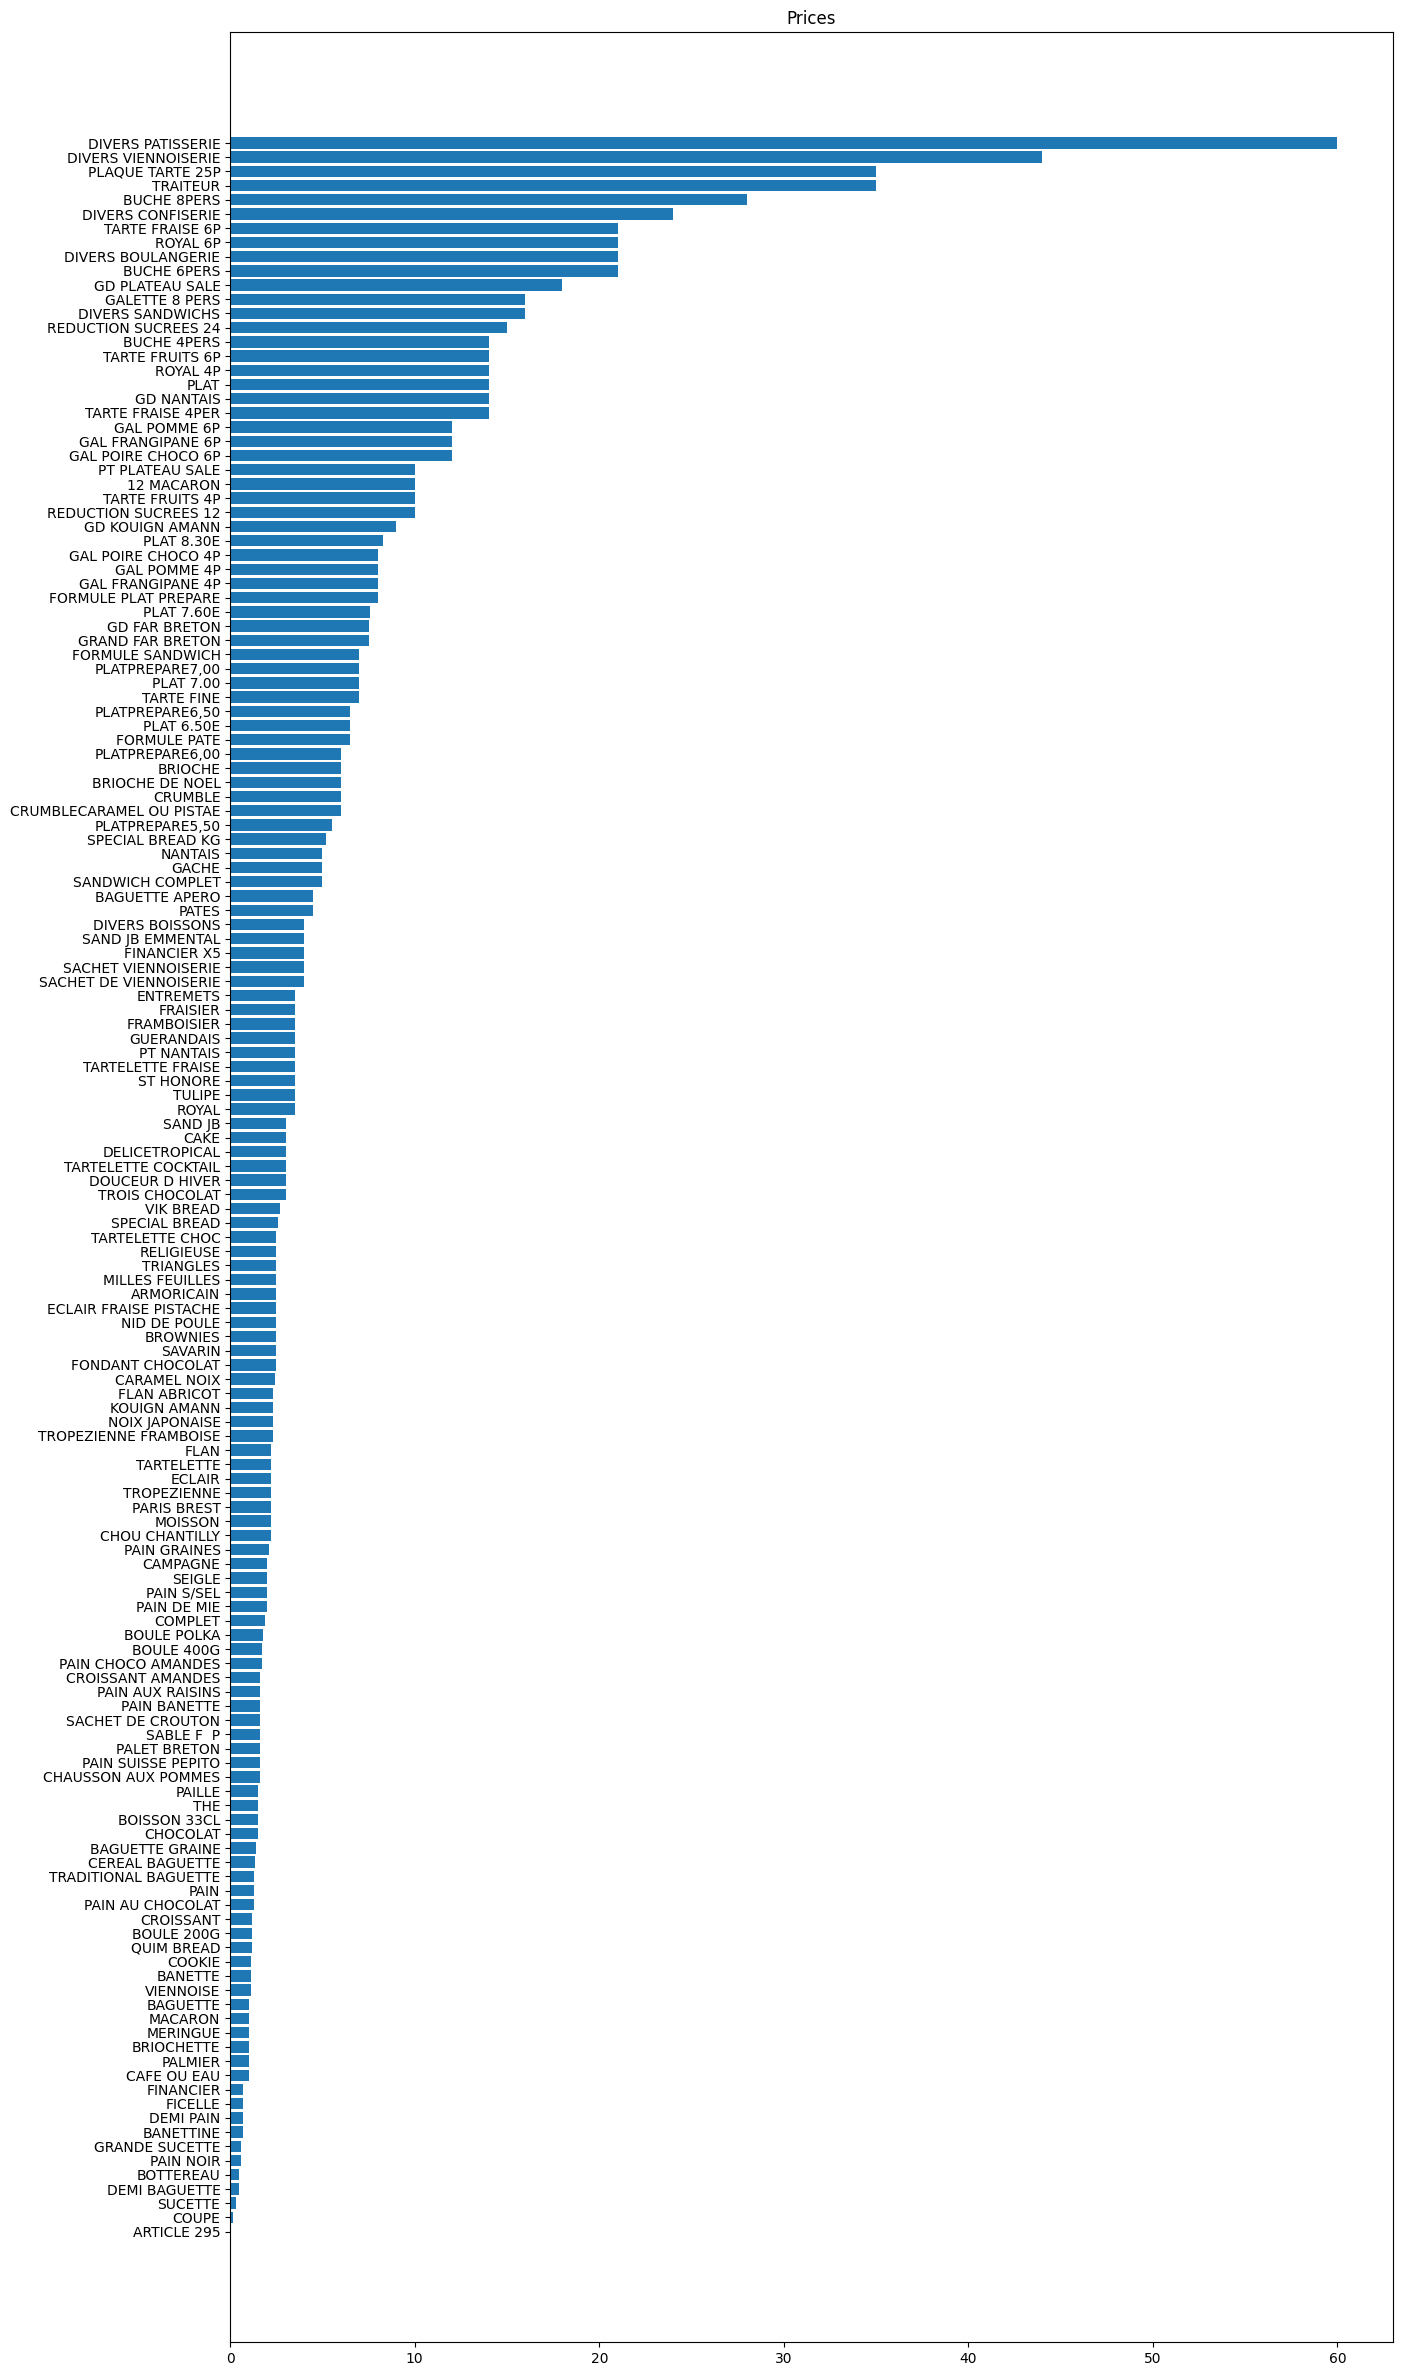

In [33]:
#creating horizontal bar chart of prices
fig, ax = plt.subplots()

ax.barh(prices['Article'], prices['UNIT_PRICE'])
ax.set_title('Prices')

fig.set_figwidth(15)
fig.set_figheight(30)

<ipython-input-34-0d3034bdb2e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_quantity['day_of_week_name'] = df_filtered_quantity['day_of_week'].map(day_name_map)
<ipython-input-34-0d3034bdb2e6>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(day_of_week_sales['day_of_week_name'], rotation=45)


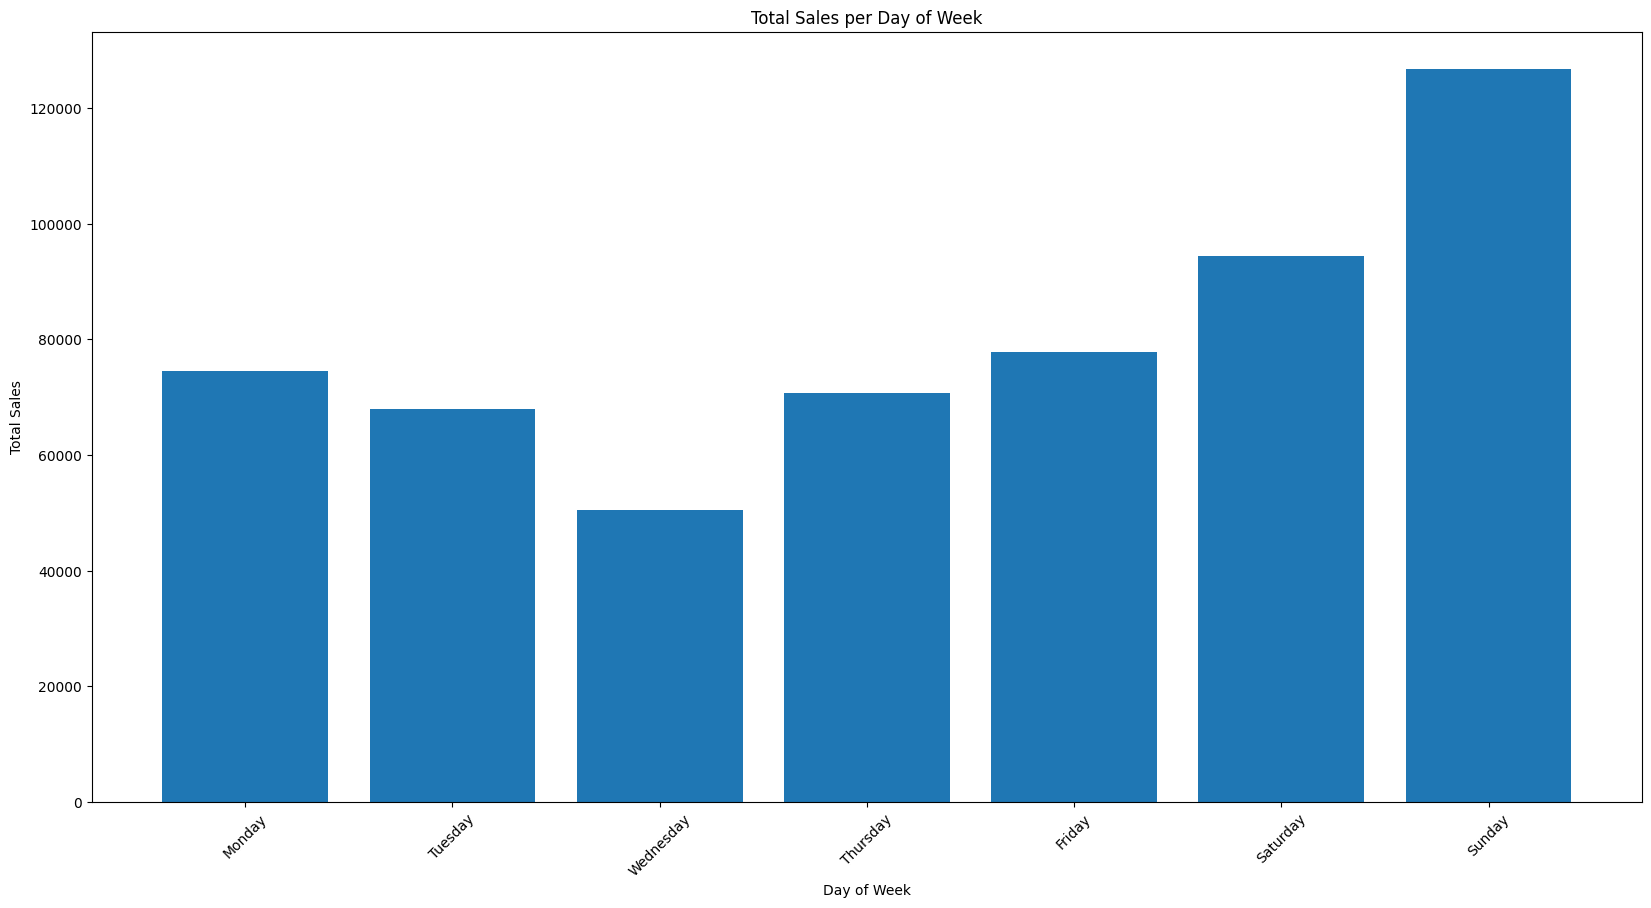

In [34]:
# Mapping day_of_week to actual day names
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_filtered_quantity['day_of_week_name'] = df_filtered_quantity['day_of_week'].map(day_name_map)

# Grouping the data by 'day_of_week_name' and summing the 'total' sales
day_of_week_sales = df_filtered_quantity.groupby('day_of_week_name').agg({'total': 'sum'}).reset_index()

# Sorting the DataFrame to maintain the order of days
day_of_week_sales['day_of_week_name'] = pd.Categorical(day_of_week_sales['day_of_week_name'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
day_of_week_sales = day_of_week_sales.sort_values('day_of_week_name')

# Creating bar chart of total sales per day of the week
fig, ax = plt.subplots()

ax.bar(day_of_week_sales['day_of_week_name'], day_of_week_sales['total'])

# Formatting the x-axis to display day names
ax.set_xticklabels(day_of_week_sales['day_of_week_name'], rotation=45)

ax.set_title('Total Sales per Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Total Sales')

fig.set_figwidth(20)
fig.set_figheight(10)

plt.show()

we could see that the sales are high during the weekends especially Sunday compared to Weekdays. This is an expected scenario as it is a holiday.

In [35]:
#creating a table of total sales per hour
hours_sales = df_filtered_quantity.groupby('hour').agg({'total':'mean'}).reset_index()

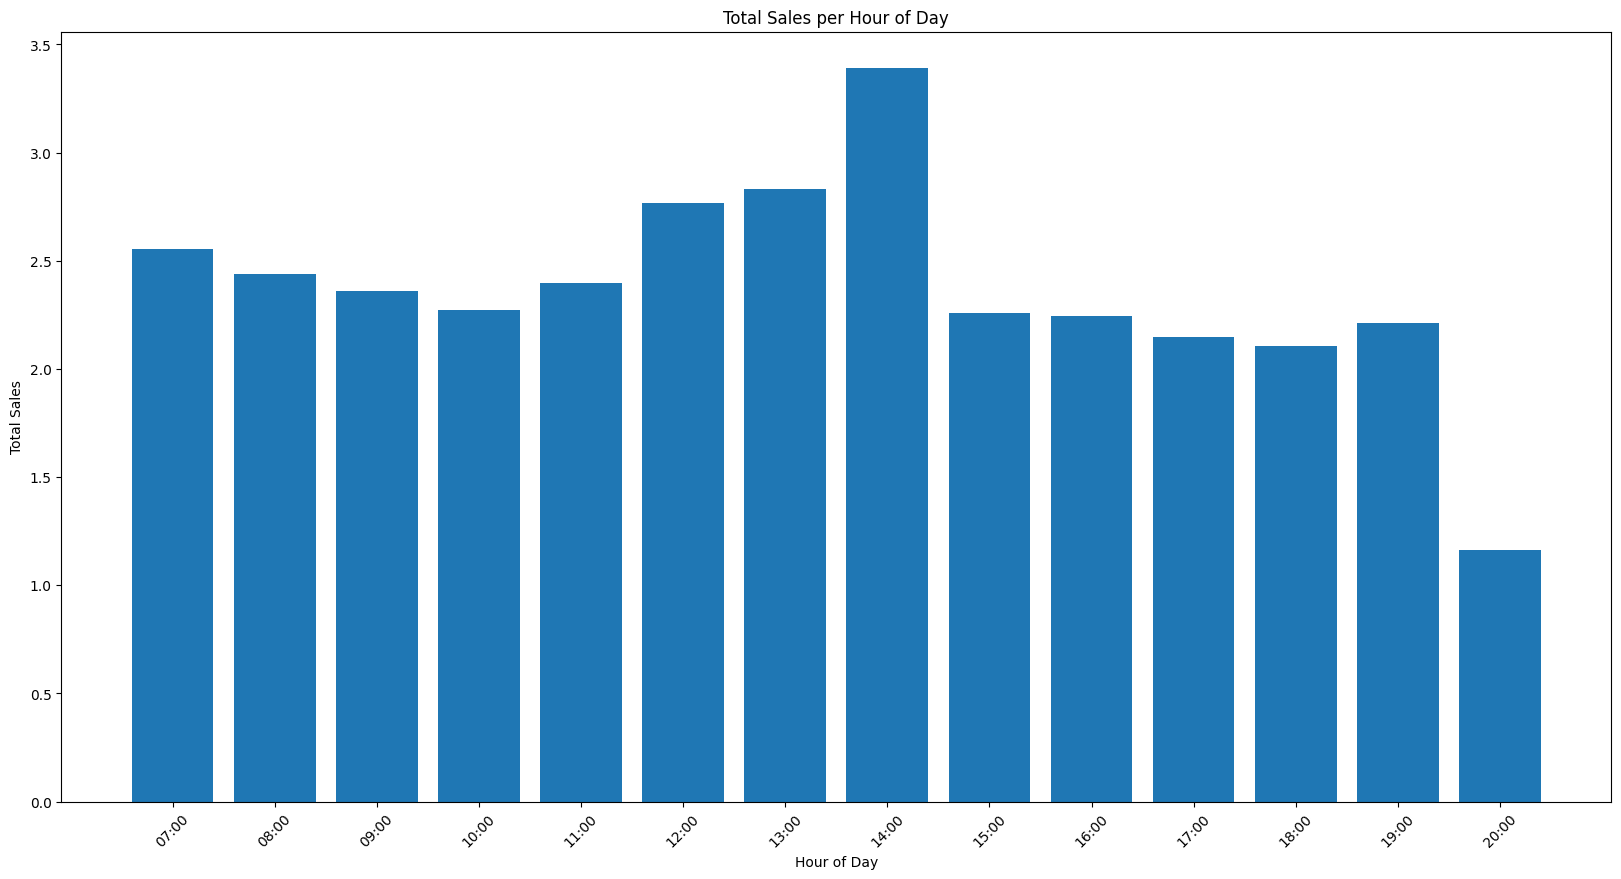

In [36]:
# Creating bar chart of total sales per hour of the day
fig, ax = plt.subplots()

ax.bar(hours_sales['hour'], hours_sales['total'])

# Formatting the x-axis to display time values
ax.set_xticks(hours_sales['hour'])
ax.set_xticklabels([f'{hour:02d}:00' for hour in hours_sales['hour']], rotation=45)

ax.set_title('Total Sales per Hour of Day')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Total Sales')

fig.set_figwidth(20)
fig.set_figheight(10)

plt.show()

In [37]:
df_filtered_sales=df_filtered_quantity

In [38]:
df_filtered_sales.shape

(232705, 10)

In [39]:
df_filtered_sales

date                time  ticket_number               Article  \
0      2021-01-02 1900-01-01 08:38:00       150040.0              BAGUETTE   
1      2021-01-02 1900-01-01 08:38:00       150040.0      PAIN AU CHOCOLAT   
2      2021-01-02 1900-01-01 09:14:00       150041.0      PAIN AU CHOCOLAT   
3      2021-01-02 1900-01-01 09:14:00       150041.0                  PAIN   
4      2021-01-02 1900-01-01 09:25:00       150042.0  TRADITIONAL BAGUETTE   
...           ...                 ...            ...                   ...   
234000 2022-09-30 1900-01-01 18:52:00       288911.0                 COUPE   
234001 2022-09-30 1900-01-01 18:52:00       288911.0            BOULE 200G   
234002 2022-09-30 1900-01-01 18:52:00       288911.0                 COUPE   
234003 2022-09-30 1900-01-01 18:55:00       288912.0  TRADITIONAL BAGUETTE   
234004 2022-09-30 1900-01-01 18:56:00       288913.0  TRADITIONAL BAGUETTE   

        Quantity  UNIT_PRICE  total  hour  day_of_week day_of_week_name  
0            1.0        0.90   0.90     8            5         Saturday  
1            3.0        1.20   3.60     8            5         Saturday  
2            2.0        1.20   2.40     9            5         Saturday  
3            1.0        1.15   1.15     9            5         Saturday  
4            5.0        1.20   6.00     9            5         Saturday  
...          ...         ...    ...   ...          ...              ...  
234000       1.0        0.15   0.15    18            4           Friday  
234001       1.0        1.20   1.20    18            4           Friday  
234002       2.0        0.15   0.30    18            4           Friday  
234003       1.0        1.30   1.30    18            4           Friday  
234004       1.0        1.30   1.30    18            4           Friday  

[232705 rows x 10 columns]

In [40]:
# Aggregate by date
aggregated_sales = df_filtered_sales.groupby('date').agg({
    'total': 'sum',
    'Quantity': 'sum',
    'Article': 'count'
}).reset_index()

In [41]:
aggregated_sales.tail(10)

date    total  Quantity  Article
590 2022-09-21   549.05     306.0      229
591 2022-09-22   593.85     357.0      250
592 2022-09-23   654.95     409.0      278
593 2022-09-24   846.45     534.0      351
594 2022-09-25  1152.85     770.0      472
595 2022-09-26   695.55     401.0      293
596 2022-09-27   769.00     433.0      319
597 2022-09-28   610.70     357.0      278
598 2022-09-29   698.30     430.0      301
599 2022-09-30   795.95     503.0      341

Weather dataset - Analysis

In [42]:
df_weather=pd.read_csv("/content/drive/MyDrive/NICD assessment/weather_2021.01.01-2022.10.31.csv")

Daily weather statistics include temperature (tavg, tmin, tmax), precipitation (prcp), snow, wind direction (wdir), wind speed (wspd), wind gust (wpgt), pressure (pres), and sunshine duration (tsun). Both the sales and weather contains ‘date’ as a common column

In [43]:
df_weather

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
0    2021-01-01   2.7   1.5   5.7  15.2   NaN  335.0  15.5  31.0  1008.6   NaN
1    2021-01-02   1.3   0.5   2.7   0.8   NaN  336.0  24.7  44.0  1010.1   NaN
2    2021-01-03   0.7  -0.3   1.6   0.0   NaN  327.0  17.1  38.9  1012.1   NaN
3    2021-01-04   0.0  -1.0   1.1   0.0   NaN  329.0  10.6  30.0  1011.4   NaN
4    2021-01-05   0.8  -0.9   2.1   0.0   NaN  338.0   6.2  30.0  1012.1   NaN
..          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
664  2022-10-27  19.8  15.7  25.0   0.0   NaN  145.0  17.4  39.0  1023.8   NaN
665  2022-10-28  20.9  17.4  25.5   0.0   NaN  136.0  16.3  39.0  1024.5   NaN
666  2022-10-29  19.6  14.9  25.5   0.0   NaN  141.0  14.3  38.9  1022.7   NaN
667  2022-10-30  18.8  15.4  24.4   0.0   NaN  136.0  17.0  33.0  1020.4   NaN
668  2022-10-31  18.6  14.5  22.4   0.0   NaN  155.0  20.2  67.0  1018.7   NaN

[669 rows x 11 columns]

In [44]:
# Drop the 'tsun' column as it is empty
df_weather = df_weather.drop(columns=['tsun'])

In [45]:
df_weather.shape

(669, 10)

In [47]:
# Convert 'date' column to datetime format
df_weather['date'] = pd.to_datetime(df_weather['date'])

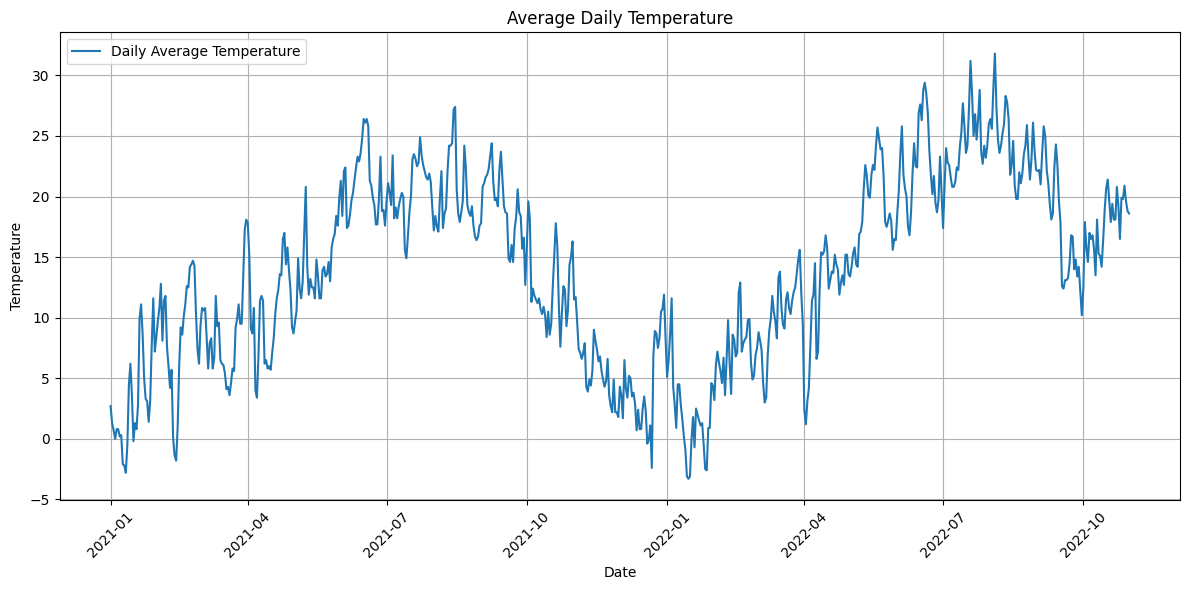

In [48]:
# Plotting the average daily temperature (tavg)
plt.figure(figsize=(12, 6))
plt.plot(df_weather['date'], df_weather['tavg'],label='Daily Average Temperature')
plt.title('Average Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

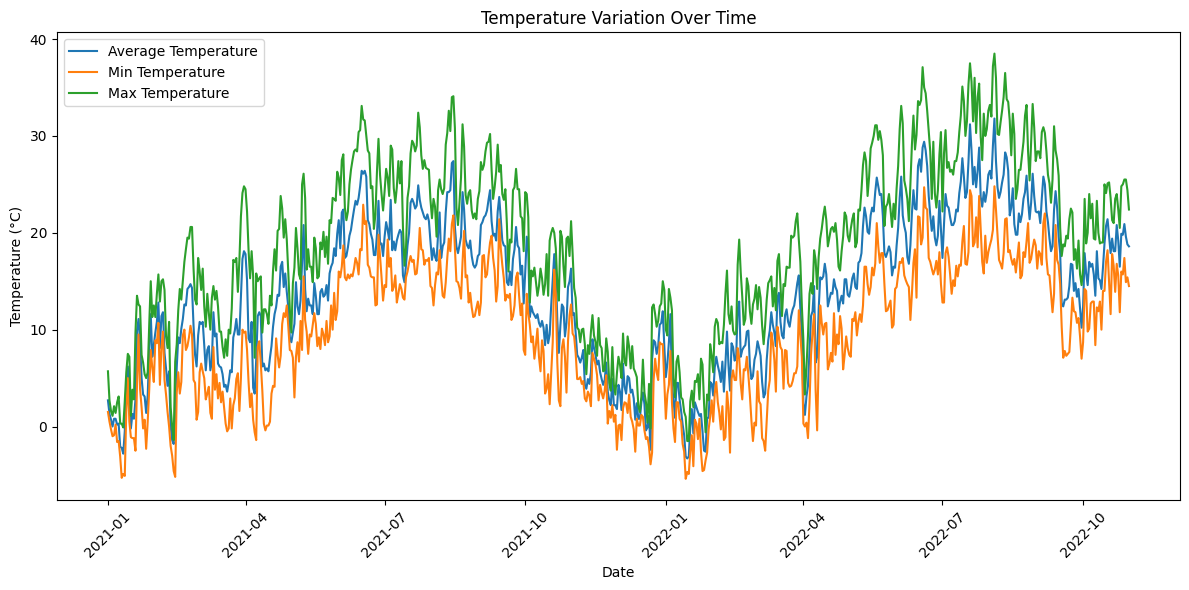

In [49]:
# Assuming 'df_weather' is your DataFrame containing the weather data
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='tavg', data=df_weather, label='Average Temperature')
sns.lineplot(x='date', y='tmin', data=df_weather, label='Min Temperature')
sns.lineplot(x='date', y='tmax', data=df_weather, label='Max Temperature')
plt.title('Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
aggregated_sales.shape

(600, 4)

In [51]:
# merging the sales and weather datasets
# Merge based on 'date' column
merged_data = pd.merge(aggregated_sales, df_weather, on='date', how='inner')

The sales dataset comprises approximately 23,000 records, while the weather dataset includes about 600 records, covering the period from January 1, 2021, to October 31, 2022. These datasets were merged based on the 'date' column using an inner join.

In [52]:
merged_data

date    total  Quantity  Article  tavg  tmin  tmax  prcp  snow  \
0   2021-01-02   987.85     581.0      365   1.3   0.5   2.7   0.8   NaN   
1   2021-01-03  1015.20     565.0      374   0.7  -0.3   1.6   0.0   NaN   
2   2021-01-04   461.90     315.0      210   0.0  -1.0   1.1   0.0   NaN   
3   2021-01-05   526.10     312.0      232   0.8  -0.9   2.1   0.0   NaN   
4   2021-01-07   544.00     310.0      215   0.2  -1.6   2.5   0.0   NaN   
..         ...      ...       ...      ...   ...   ...   ...   ...   ...   
595 2022-09-26   695.55     401.0      293  14.8  11.8  18.3   2.8   NaN   
596 2022-09-27   769.00     433.0      319  13.4  10.7  16.3   3.6   NaN   
597 2022-09-28   610.70     357.0      278  14.2  11.2  19.2   4.3   NaN   
598 2022-09-29   698.30     430.0      301  12.2   9.3  15.7  24.4   NaN   
599 2022-09-30   795.95     503.0      341  10.2   7.0  14.6   0.0   NaN   

      wdir  wspd  wpgt    pres  
0    336.0  24.7  44.0  1010.1  
1    327.0  17.1  38.9  1012.1  
2    329.0  10.6  30.0  1011.4  
3    338.0   6.2  30.0  1012.1  
4    343.0   6.2  24.0  1017.1  
..     ...   ...   ...     ...  
595  297.0   7.8  22.2  1011.3  
596  240.0  10.5  33.0  1008.6  
597  190.0  15.9  48.0  1003.1  
598  321.0   6.9  18.5  1003.2  
599  346.0   9.9  40.8  1011.7  

[600 rows x 13 columns]

In [53]:
# Extract day of the week (Monday, Tuesday, ...) and month (January, ...)
merged_data['day_of_week'] = merged_data['date'].dt.day_name()
merged_data['month'] = merged_data['date'].dt.month_name()

# Display the updated DataFrame
print(merged_data)

          date    total  Quantity  Article  tavg  tmin  tmax  prcp  snow  \
0   2021-01-02   987.85     581.0      365   1.3   0.5   2.7   0.8   NaN   
1   2021-01-03  1015.20     565.0      374   0.7  -0.3   1.6   0.0   NaN   
2   2021-01-04   461.90     315.0      210   0.0  -1.0   1.1   0.0   NaN   
3   2021-01-05   526.10     312.0      232   0.8  -0.9   2.1   0.0   NaN   
4   2021-01-07   544.00     310.0      215   0.2  -1.6   2.5   0.0   NaN   
..         ...      ...       ...      ...   ...   ...   ...   ...   ...   
595 2022-09-26   695.55     401.0      293  14.8  11.8  18.3   2.8   NaN   
596 2022-09-27   769.00     433.0      319  13.4  10.7  16.3   3.6   NaN   
597 2022-09-28   610.70     357.0      278  14.2  11.2  19.2   4.3   NaN   
598 2022-09-29   698.30     430.0      301  12.2   9.3  15.7  24.4   NaN   
599 2022-09-30   795.95     503.0      341  10.2   7.0  14.6   0.0   NaN   

      wdir  wspd  wpgt    pres day_of_week      month  
0    336.0  24.7  44.0  1010.1 

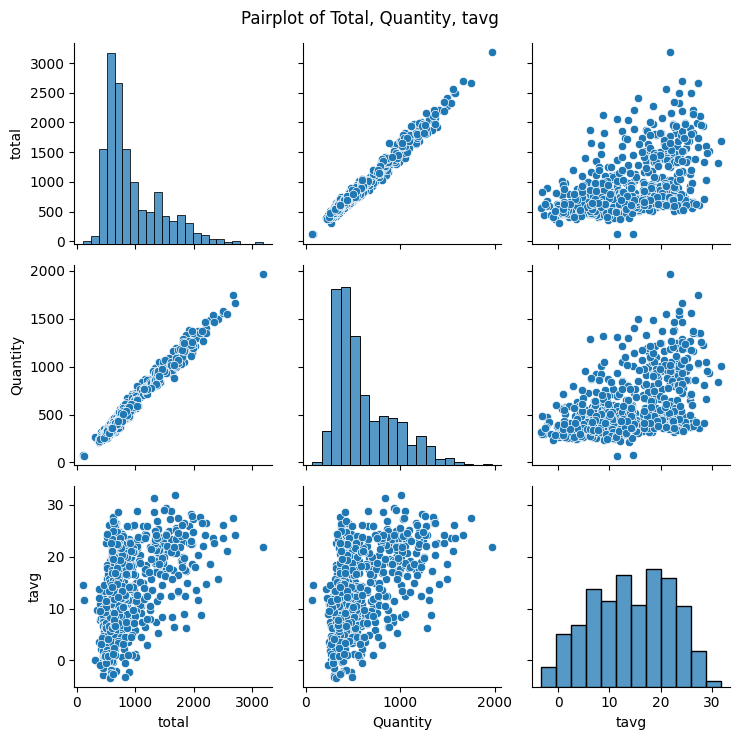

In [54]:

# Encoding categorical variables with custom mappings
day_of_week_map = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
month_map = {
    'January': 0, 'February': 1, 'March': 2, 'April': 3,
    'May': 4, 'June': 5, 'July': 6, 'August': 7,
    'September': 8, 'October': 9, 'November': 10, 'December': 11
}

merged_data['day_of_week_code'] = merged_data['day_of_week'].map(day_of_week_map)
merged_data['month_code'] = merged_data['month'].map(month_map)

# Select columns for pairplot
cols = ['total', 'Quantity', 'tavg']

# Create pairplot
sns.pairplot(merged_data[cols])
plt.suptitle('Pairplot of Total, Quantity, tavg')
plt.tight_layout()
plt.show()

In [55]:
merged_data

date    total  Quantity  Article  tavg  tmin  tmax  prcp  snow  \
0   2021-01-02   987.85     581.0      365   1.3   0.5   2.7   0.8   NaN   
1   2021-01-03  1015.20     565.0      374   0.7  -0.3   1.6   0.0   NaN   
2   2021-01-04   461.90     315.0      210   0.0  -1.0   1.1   0.0   NaN   
3   2021-01-05   526.10     312.0      232   0.8  -0.9   2.1   0.0   NaN   
4   2021-01-07   544.00     310.0      215   0.2  -1.6   2.5   0.0   NaN   
..         ...      ...       ...      ...   ...   ...   ...   ...   ...   
595 2022-09-26   695.55     401.0      293  14.8  11.8  18.3   2.8   NaN   
596 2022-09-27   769.00     433.0      319  13.4  10.7  16.3   3.6   NaN   
597 2022-09-28   610.70     357.0      278  14.2  11.2  19.2   4.3   NaN   
598 2022-09-29   698.30     430.0      301  12.2   9.3  15.7  24.4   NaN   
599 2022-09-30   795.95     503.0      341  10.2   7.0  14.6   0.0   NaN   

      wdir  wspd  wpgt    pres day_of_week      month  day_of_week_code  \
0    336.0  24.7  44.0  1010.1    Saturday    January                 5   
1    327.0  17.1  38.9  1012.1      Sunday    January                 6   
2    329.0  10.6  30.0  1011.4      Monday    January                 0   
3    338.0   6.2  30.0  1012.1     Tuesday    January                 1   
4    343.0   6.2  24.0  1017.1    Thursday    January                 3   
..     ...   ...   ...     ...         ...        ...               ...   
595  297.0   7.8  22.2  1011.3      Monday  September                 0   
596  240.0  10.5  33.0  1008.6     Tuesday  September                 1   
597  190.0  15.9  48.0  1003.1   Wednesday  September                 2   
598  321.0   6.9  18.5  1003.2    Thursday  September                 3   
599  346.0   9.9  40.8  1011.7      Friday  September                 4   

     month_code  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
595           8  
596           8  
597           8  
598           8  
599           8  

[600 rows x 17 columns]

Correlation between tavg and total: 0.4879315408420838


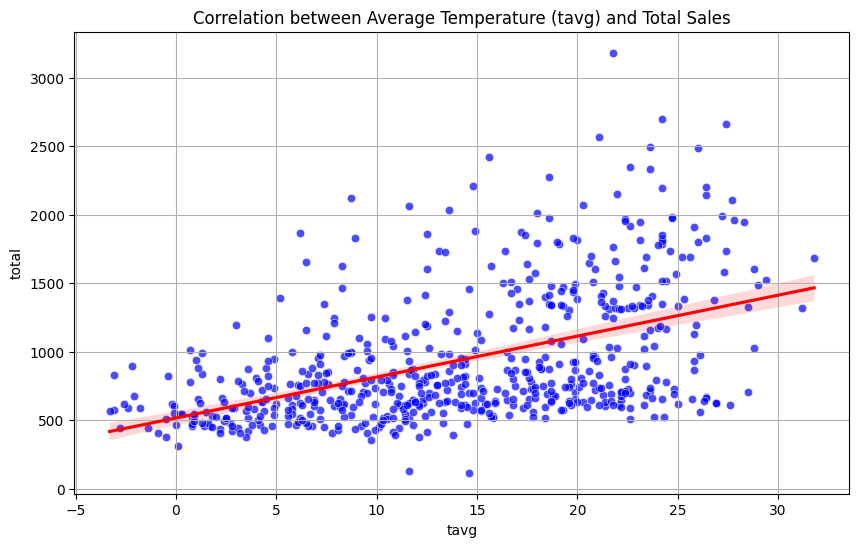

In [56]:
# Calculate correlation between 'tavg' and 'total'
correlation = merged_data['tavg'].corr(merged_data['total'])

print(f"Correlation between tavg and total: {correlation}")

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='tavg', y='total', color='blue', alpha=0.7)
plt.title('Correlation between Average Temperature (tavg) and Total Sales')
plt.xlabel('Average Temperature (tavg)')
plt.ylabel('Total Sales')
plt.grid(True)

# Adding a trend line
sns.regplot(data=merged_data, x='tavg', y='total', scatter=False, color='red')

plt.show()

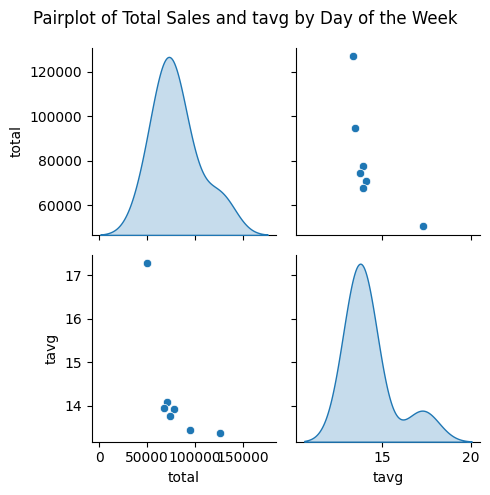

In [57]:
# Aggregate total sales and average temperature by day of the week
sales_by_day = merged_data.groupby('day_of_week').agg({
    'total': 'sum',
    'tavg': 'mean'
}).reset_index()

# Create pairplot
sns.pairplot(sales_by_day[['total', 'tavg']], diag_kind='kde')
plt.suptitle('Pairplot of Total Sales and tavg by Day of the Week')
plt.tight_layout()
plt.show()

In [58]:
sales_by_day

day_of_week      total       tavg
0      Friday   77745.82  13.912088
1      Monday   74539.40  13.771591
2    Saturday   94511.92  13.447778
3      Sunday  126863.53  13.364835
4    Thursday   70721.73  14.091011
5     Tuesday   67896.90  13.937079
6   Wednesday   50437.40  17.270968

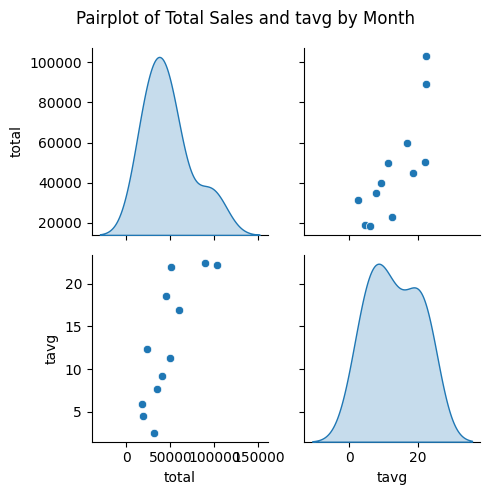

In [59]:
# Aggregate total sales and average temperature by day of the week
sales_by_month = merged_data.groupby('month').agg({
    'total': 'sum',
    'tavg': 'mean'
}).reset_index()

# Create pairplot
sns.pairplot(sales_by_month[['total', 'tavg']], diag_kind='kde')
plt.suptitle('Pairplot of Total Sales and tavg by Month')
plt.tight_layout()
plt.show()

In [60]:
sales_by_month

month      total       tavg
0       April   49980.35  11.279661
1      August  102898.15  22.156452
2    December   19137.40   4.546154
3    February   34782.30   7.635417
4     January   31123.27   2.482692
5        July   89360.67  22.382258
6        June   50334.30  21.913333
7       March   39926.61   9.242105
8         May   59543.30  16.857895
9    November   18188.40   5.914286
10    October   22806.00  12.370968
11  September   44635.95  18.575862

In [61]:
merged_data

date    total  Quantity  Article  tavg  tmin  tmax  prcp  snow  \
0   2021-01-02   987.85     581.0      365   1.3   0.5   2.7   0.8   NaN   
1   2021-01-03  1015.20     565.0      374   0.7  -0.3   1.6   0.0   NaN   
2   2021-01-04   461.90     315.0      210   0.0  -1.0   1.1   0.0   NaN   
3   2021-01-05   526.10     312.0      232   0.8  -0.9   2.1   0.0   NaN   
4   2021-01-07   544.00     310.0      215   0.2  -1.6   2.5   0.0   NaN   
..         ...      ...       ...      ...   ...   ...   ...   ...   ...   
595 2022-09-26   695.55     401.0      293  14.8  11.8  18.3   2.8   NaN   
596 2022-09-27   769.00     433.0      319  13.4  10.7  16.3   3.6   NaN   
597 2022-09-28   610.70     357.0      278  14.2  11.2  19.2   4.3   NaN   
598 2022-09-29   698.30     430.0      301  12.2   9.3  15.7  24.4   NaN   
599 2022-09-30   795.95     503.0      341  10.2   7.0  14.6   0.0   NaN   

      wdir  wspd  wpgt    pres day_of_week      month  day_of_week_code  \
0    336.0  24.7  44.0  1010.1    Saturday    January                 5   
1    327.0  17.1  38.9  1012.1      Sunday    January                 6   
2    329.0  10.6  30.0  1011.4      Monday    January                 0   
3    338.0   6.2  30.0  1012.1     Tuesday    January                 1   
4    343.0   6.2  24.0  1017.1    Thursday    January                 3   
..     ...   ...   ...     ...         ...        ...               ...   
595  297.0   7.8  22.2  1011.3      Monday  September                 0   
596  240.0  10.5  33.0  1008.6     Tuesday  September                 1   
597  190.0  15.9  48.0  1003.1   Wednesday  September                 2   
598  321.0   6.9  18.5  1003.2    Thursday  September                 3   
599  346.0   9.9  40.8  1011.7      Friday  September                 4   

     month_code  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
595           8  
596           8  
597           8  
598           8  
599           8  

[600 rows x 17 columns]

In [62]:
# Extract the year and week of the year
merged_data['year'] = merged_data['date'].dt.year
merged_data['week_of_year'] = merged_data['date'].dt.isocalendar().week

print(merged_data.head())

        date    total  Quantity  Article  tavg  tmin  tmax  prcp  snow   wdir  \
0 2021-01-02   987.85     581.0      365   1.3   0.5   2.7   0.8   NaN  336.0   
1 2021-01-03  1015.20     565.0      374   0.7  -0.3   1.6   0.0   NaN  327.0   
2 2021-01-04   461.90     315.0      210   0.0  -1.0   1.1   0.0   NaN  329.0   
3 2021-01-05   526.10     312.0      232   0.8  -0.9   2.1   0.0   NaN  338.0   
4 2021-01-07   544.00     310.0      215   0.2  -1.6   2.5   0.0   NaN  343.0   

   wspd  wpgt    pres day_of_week    month  day_of_week_code  month_code  \
0  24.7  44.0  1010.1    Saturday  January                 5           0   
1  17.1  38.9  1012.1      Sunday  January                 6           0   
2  10.6  30.0  1011.4      Monday  January                 0           0   
3   6.2  30.0  1012.1     Tuesday  January                 1           0   
4   6.2  24.0  1017.1    Thursday  January                 3           0   

   year  week_of_year  
0  2021            53  
1  2021 

Weather and sales data combined by date column as primary key

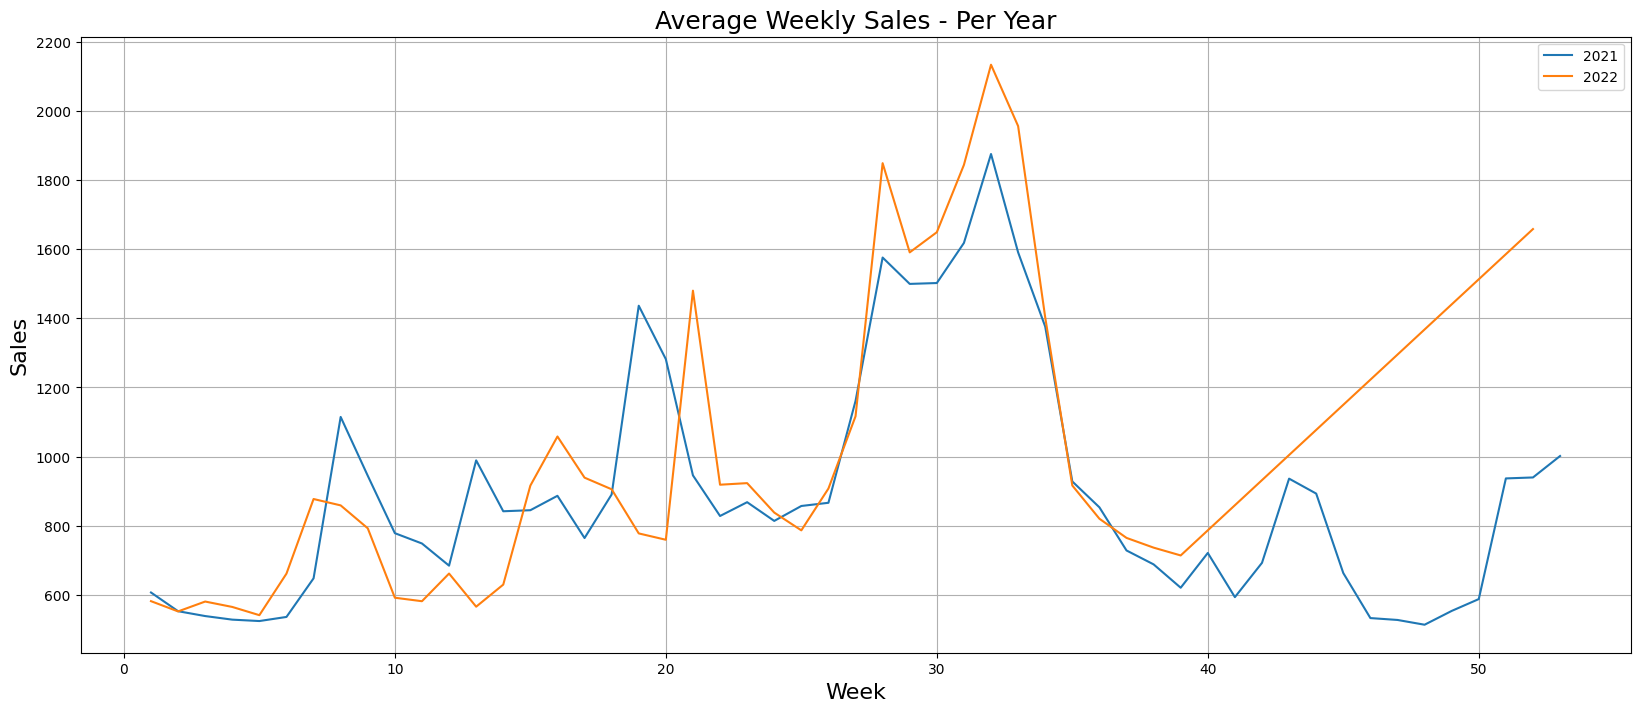

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data is already defined and processed

# Filter data for the years 2021 and 2022
weekly_sales_2021 = merged_data[merged_data.year == 2021].groupby('week_of_year')['total'].mean()
weekly_sales_2022 = merged_data[merged_data.year == 2022].groupby('week_of_year')['total'].mean()

# Plotting the data
plt.figure(figsize=(20, 8))

# Plotting 2021 sales
sns.lineplot(x=weekly_sales_2021.index, y=weekly_sales_2021.values, label='2021')

# Plotting 2022 sales
sns.lineplot(x=weekly_sales_2022.index, y=weekly_sales_2022.values, label='2022')

plt.grid()
plt.legend()
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()


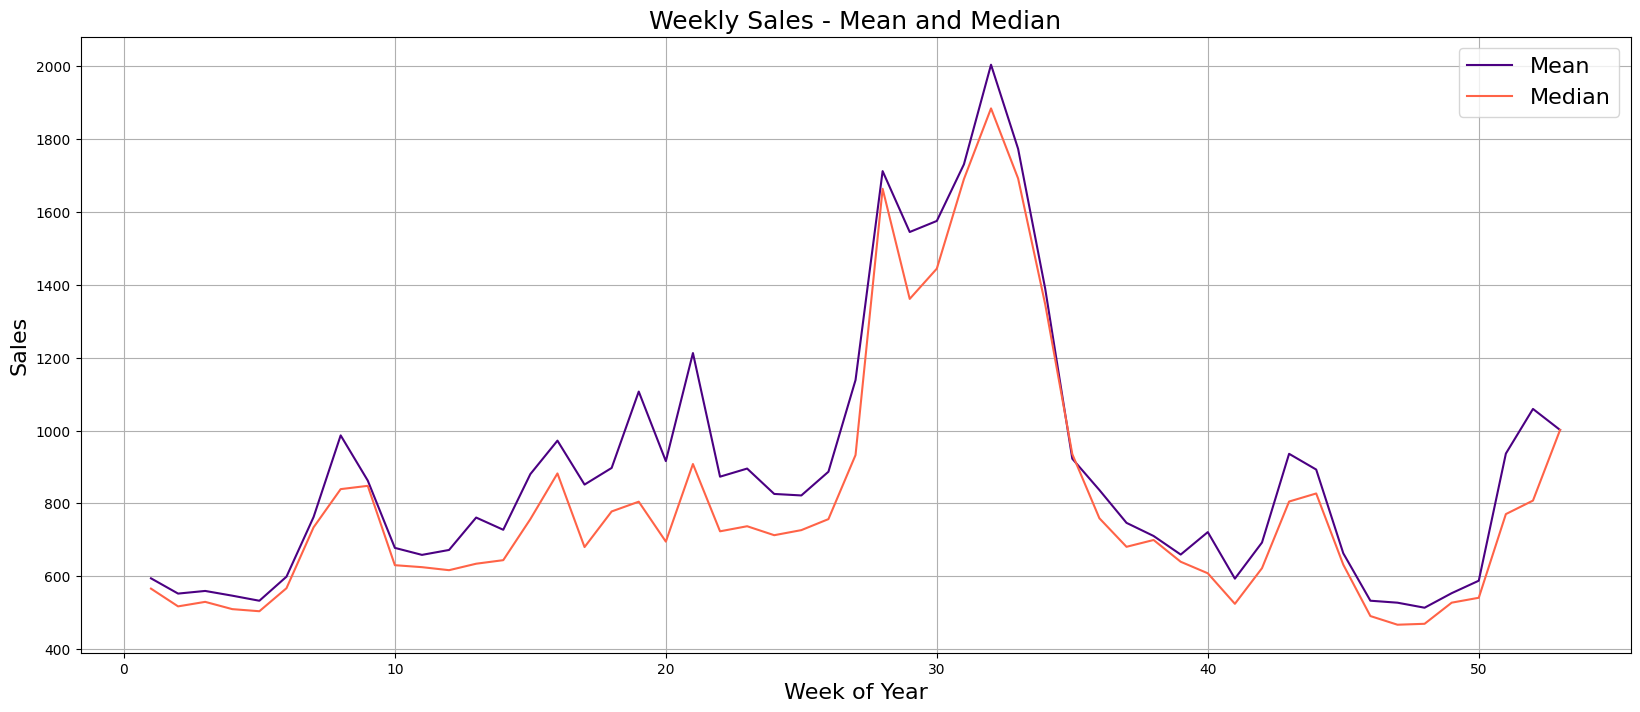

In [64]:
# Calculate the weekly mean and median sales
weekly_sales_mean = merged_data.groupby('week_of_year')['total'].mean()
weekly_sales_median = merged_data.groupby('week_of_year')['total'].median()

# Plotting the data
plt.figure(figsize=(20, 8))

# Plotting mean sales
sns.lineplot(x=weekly_sales_mean.index, y=weekly_sales_mean.values, color='indigo', label='Mean')

# Plotting median sales
sns.lineplot(x=weekly_sales_median.index, y=weekly_sales_median.values, color='tomato', label='Median')

plt.grid()
plt.legend(loc='best', fontsize=16)
plt.title('Weekly Sales - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week of Year', fontsize=16)
plt.show()

In [65]:
import plotly.express as px
px.histogram(merged_data, x='tavg', y ='total', marginal='box')

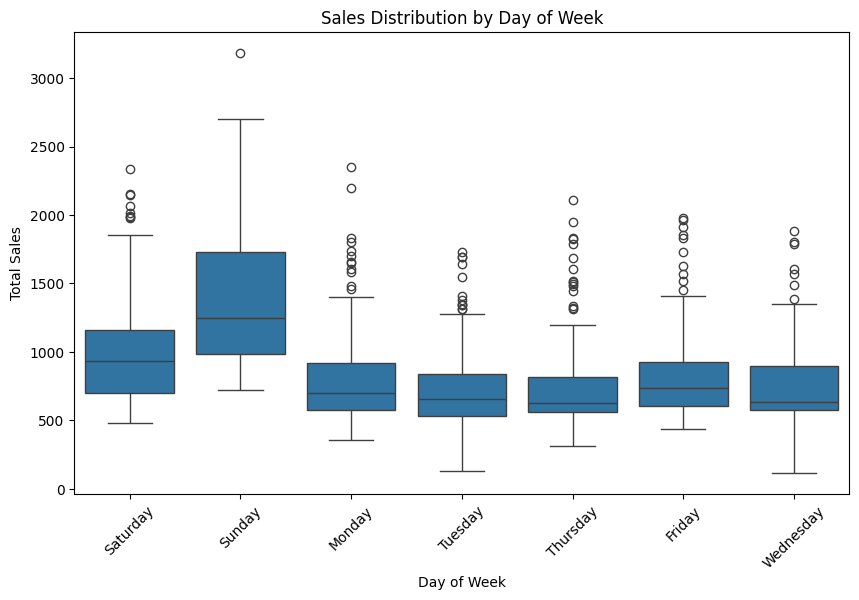

In [66]:
# Plotting Sales by Day of Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='total', data=merged_data)
plt.title('Sales Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

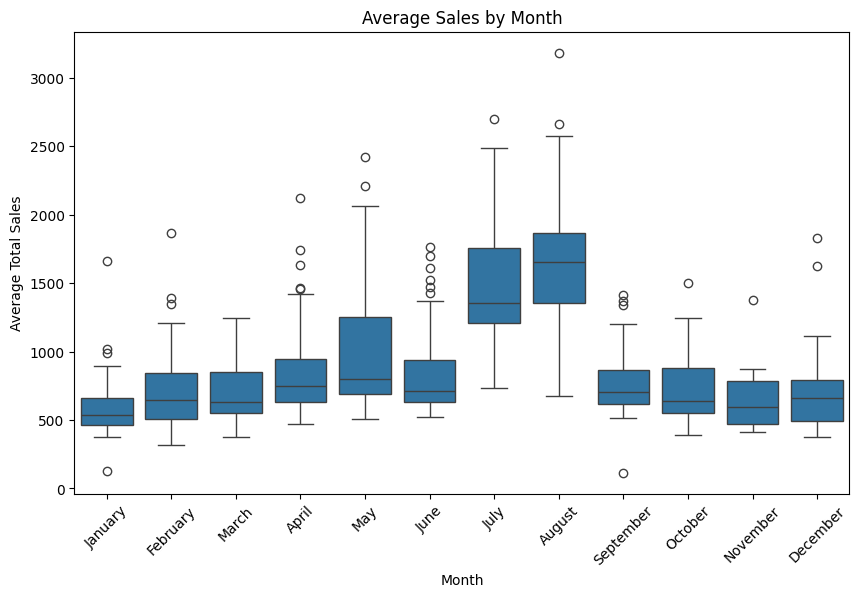

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='total', data=merged_data)
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')
plt.xticks(rotation=45)
plt.show()

We observed that sales peak during warmer months, notably in August and July, highlighting the weather's influence on sales patterns.

<Figure size 1000x600 with 0 Axes>

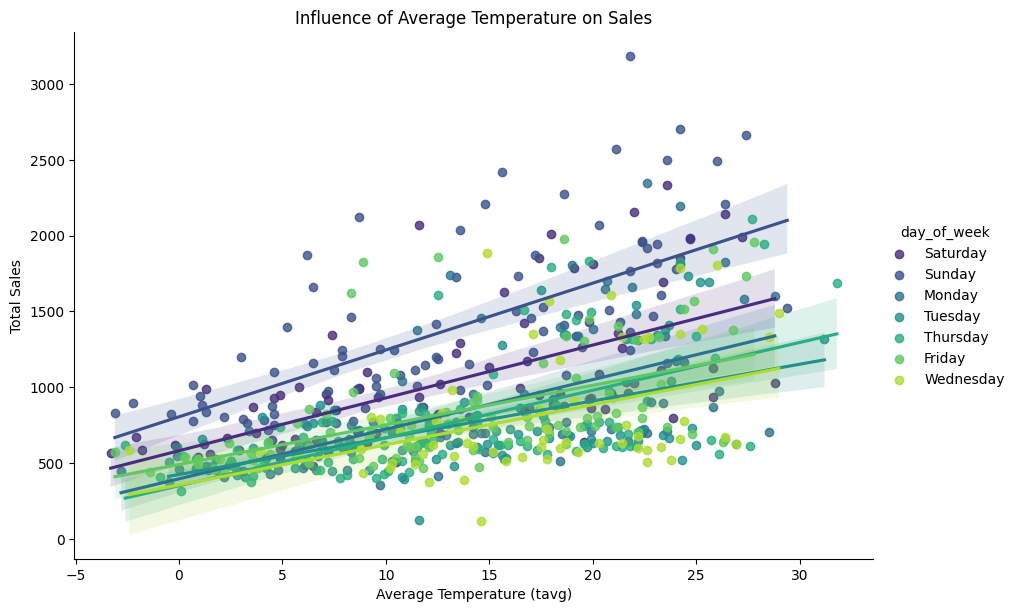

In [69]:
# Scatter plot of Sales vs. tavg with regression line
plt.figure(figsize=(10, 6))
sns.lmplot(x='tavg', y='total', hue='day_of_week', data=merged_data, palette='viridis', aspect=1.5, height=6)
plt.title('Influence of Average Temperature on Sales')
plt.xlabel('Average Temperature (tavg)')
plt.ylabel('Total Sales')
# plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

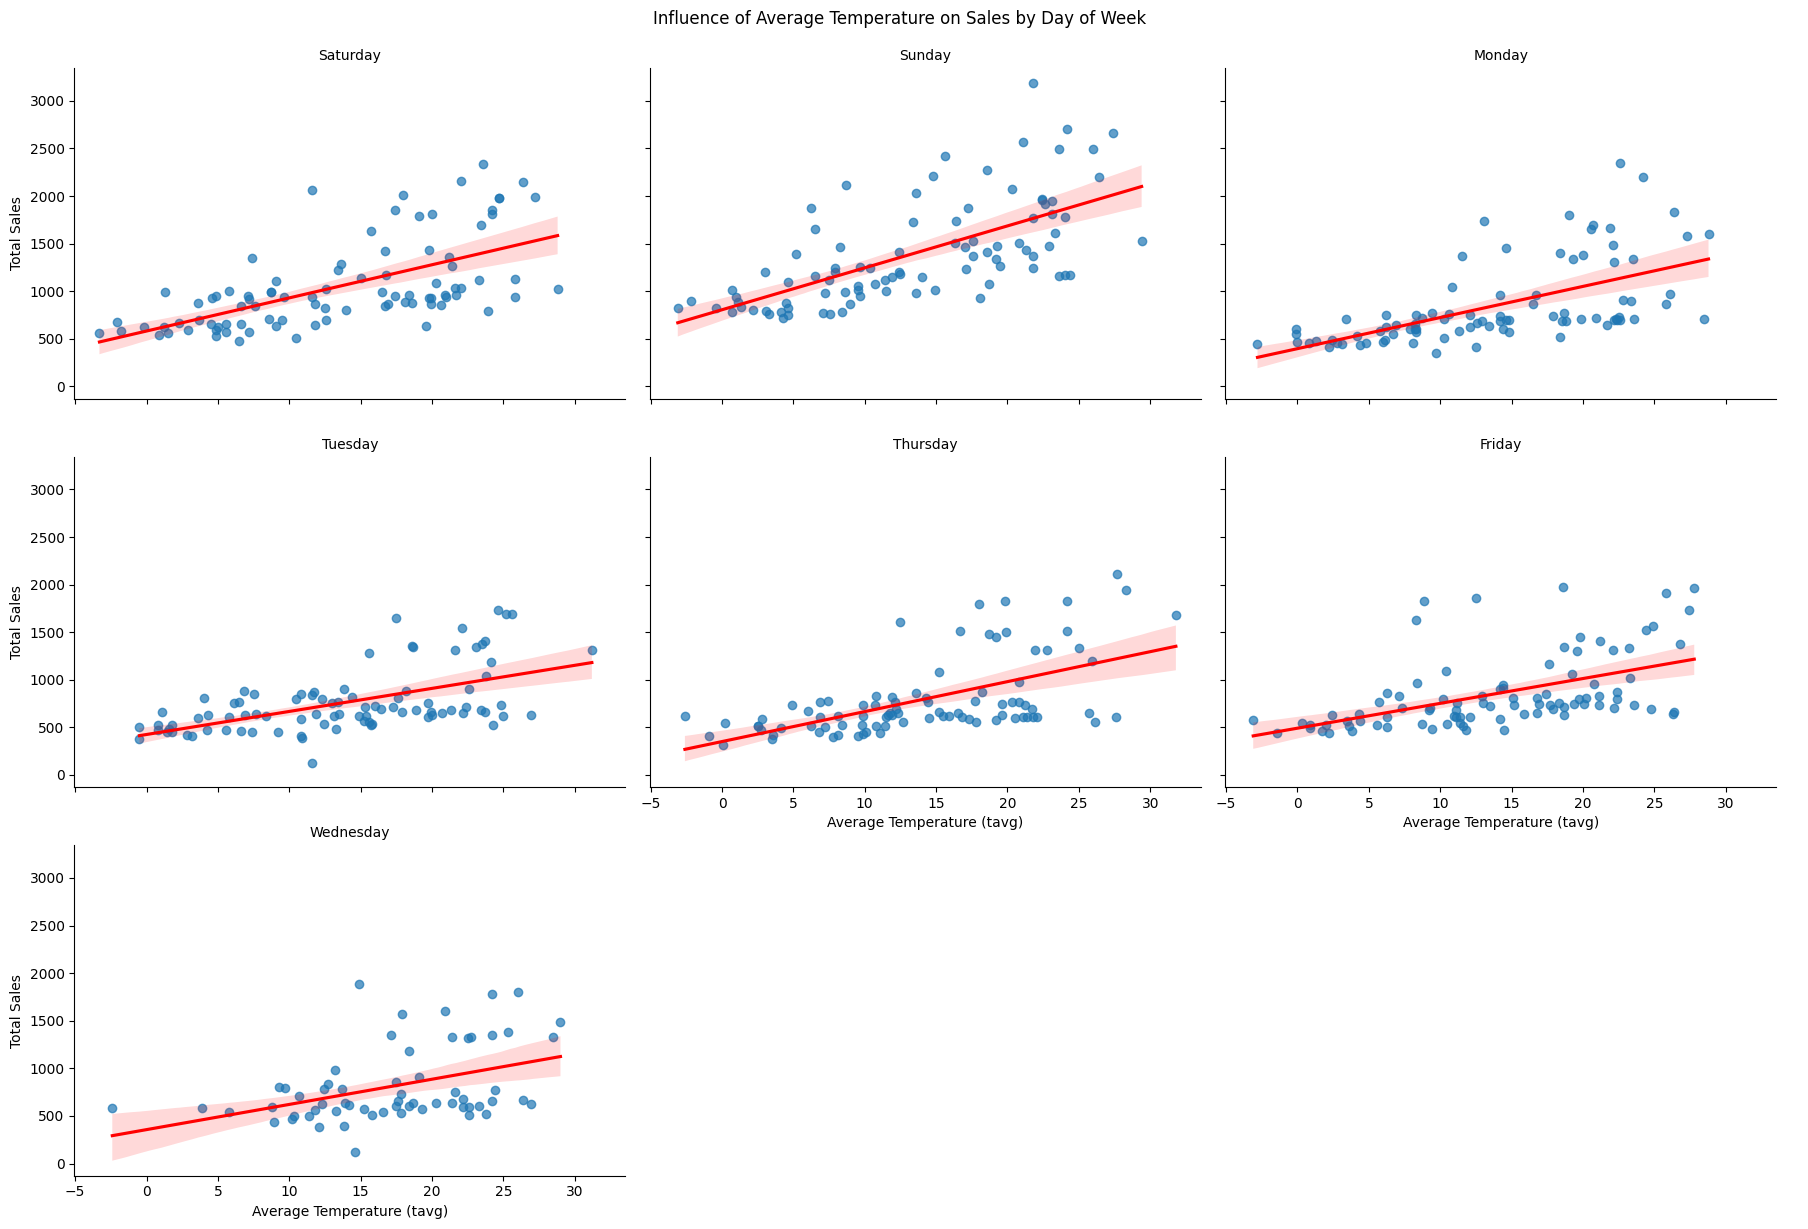

In [70]:
# FacetGrid for Sales vs. tavg by Day of Week with regression lines
g = sns.FacetGrid(merged_data, col='day_of_week', col_wrap=3, height=4, aspect=1.5, palette='viridis')
g.map(sns.regplot, 'tavg', 'total', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
g.add_legend()
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set_axis_labels('Average Temperature (tavg)', 'Total Sales')
plt.suptitle('Influence of Average Temperature on Sales by Day of Week', y=1.02)
plt.show()

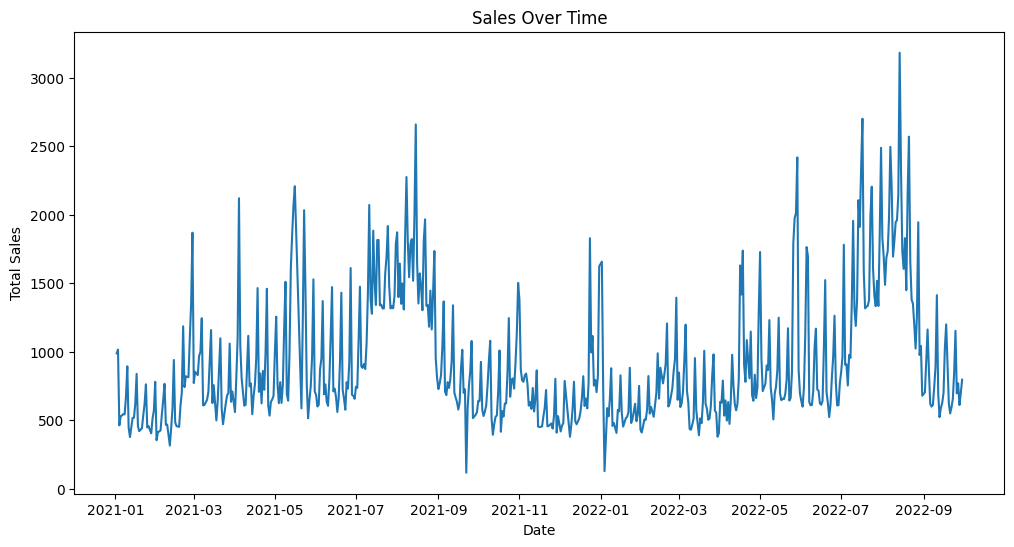

In [71]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total', data=merged_data)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

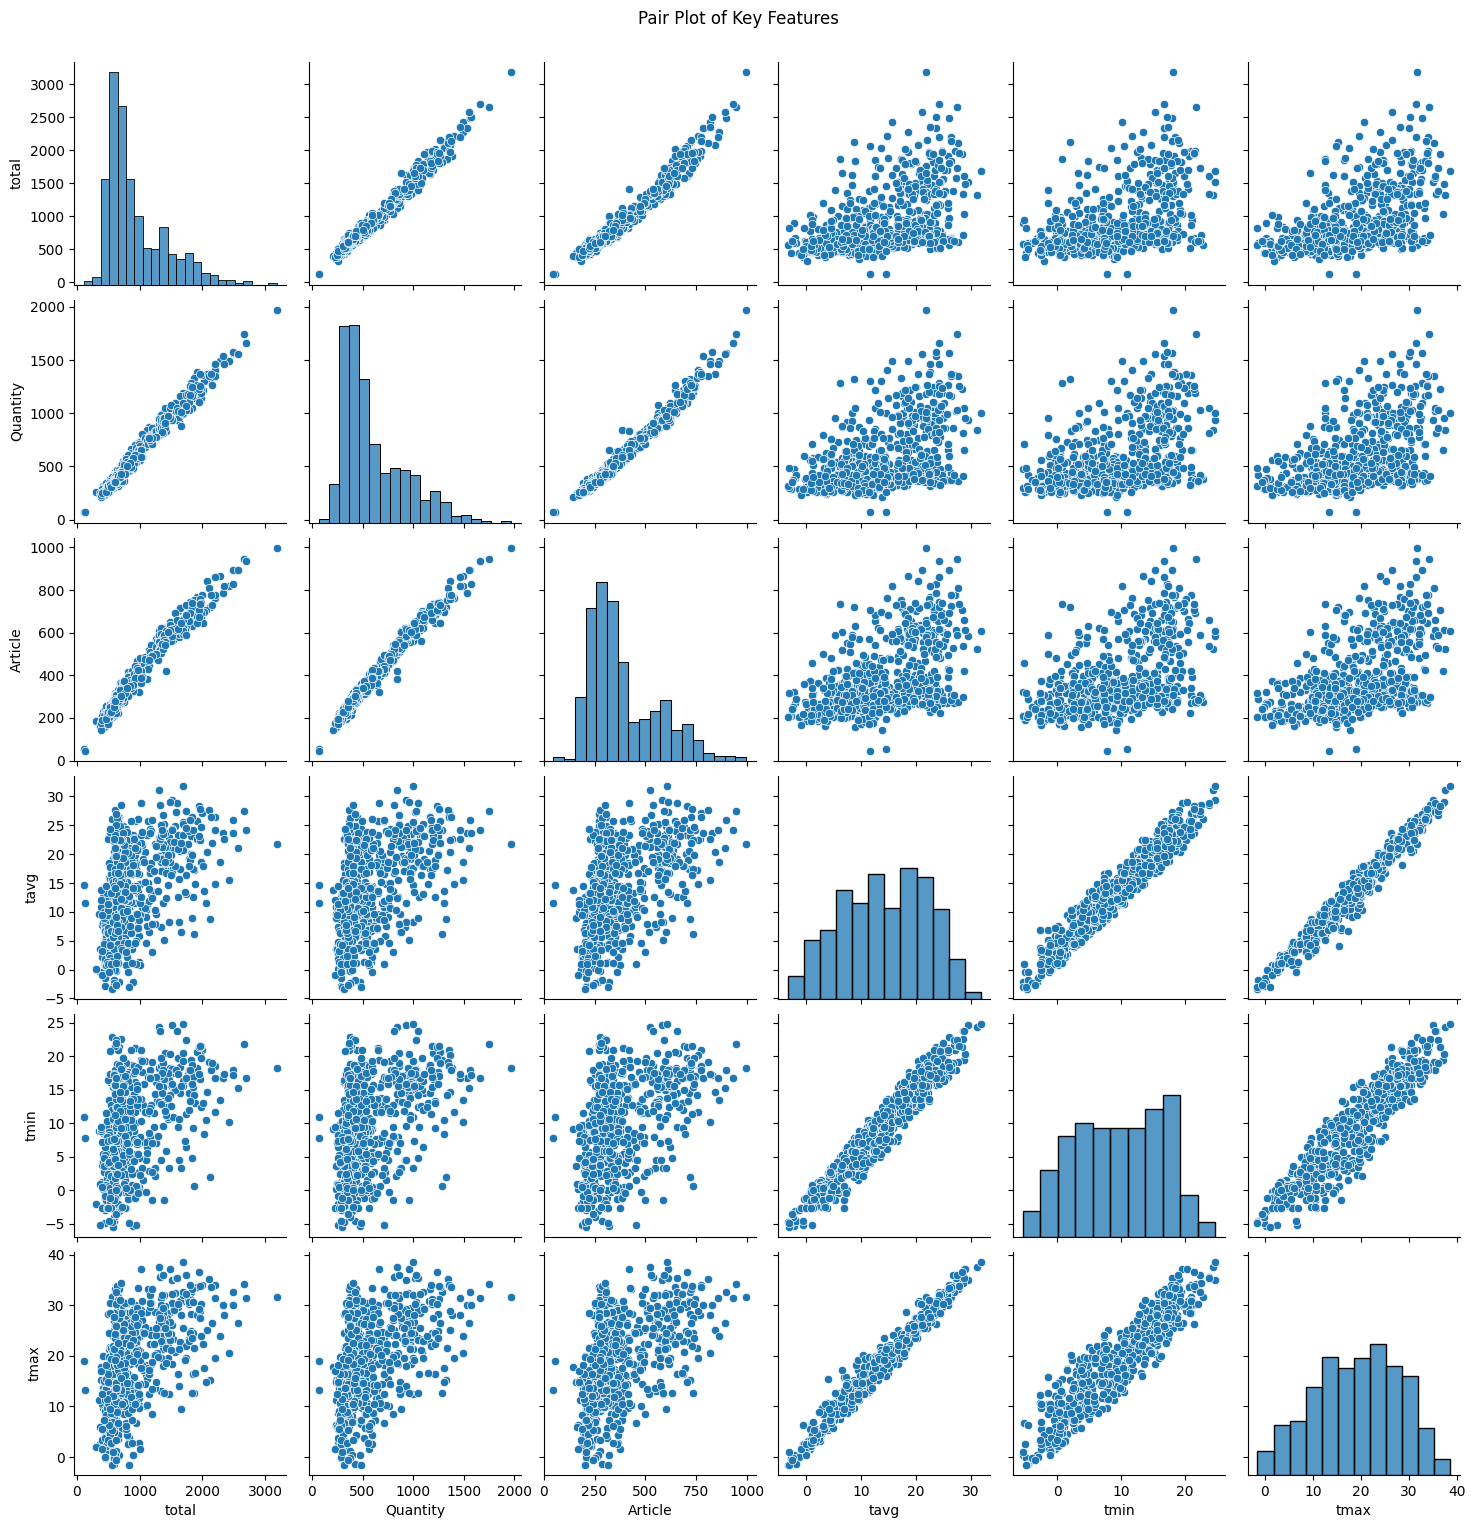

In [72]:
sns.pairplot(merged_data[['total', 'Quantity', 'Article', 'tavg', 'tmin', 'tmax']])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

In [73]:
merged_data

date    total  Quantity  Article  tavg  tmin  tmax  prcp  snow  \
0   2021-01-02   987.85     581.0      365   1.3   0.5   2.7   0.8   NaN   
1   2021-01-03  1015.20     565.0      374   0.7  -0.3   1.6   0.0   NaN   
2   2021-01-04   461.90     315.0      210   0.0  -1.0   1.1   0.0   NaN   
3   2021-01-05   526.10     312.0      232   0.8  -0.9   2.1   0.0   NaN   
4   2021-01-07   544.00     310.0      215   0.2  -1.6   2.5   0.0   NaN   
..         ...      ...       ...      ...   ...   ...   ...   ...   ...   
595 2022-09-26   695.55     401.0      293  14.8  11.8  18.3   2.8   NaN   
596 2022-09-27   769.00     433.0      319  13.4  10.7  16.3   3.6   NaN   
597 2022-09-28   610.70     357.0      278  14.2  11.2  19.2   4.3   NaN   
598 2022-09-29   698.30     430.0      301  12.2   9.3  15.7  24.4   NaN   
599 2022-09-30   795.95     503.0      341  10.2   7.0  14.6   0.0   NaN   

      wdir  wspd  wpgt    pres day_of_week      month  day_of_week_code  \
0    336.0  24.7  44.0  1010.1    Saturday    January                 5   
1    327.0  17.1  38.9  1012.1      Sunday    January                 6   
2    329.0  10.6  30.0  1011.4      Monday    January                 0   
3    338.0   6.2  30.0  1012.1     Tuesday    January                 1   
4    343.0   6.2  24.0  1017.1    Thursday    January                 3   
..     ...   ...   ...     ...         ...        ...               ...   
595  297.0   7.8  22.2  1011.3      Monday  September                 0   
596  240.0  10.5  33.0  1008.6     Tuesday  September                 1   
597  190.0  15.9  48.0  1003.1   Wednesday  September                 2   
598  321.0   6.9  18.5  1003.2    Thursday  September                 3   
599  346.0   9.9  40.8  1011.7      Friday  September                 4   

     month_code  year  week_of_year  
0             0  2021            53  
1             0  2021            53  
2             0  2021             1  
3             0  2021             1  
4             0  2021             1  
..          ...   ...           ...  
595           8  2022            39  
596           8  2022            39  
597           8  2022            39  
598           8  2022            39  
599           8  2022            39  

[600 rows x 19 columns]

In [74]:
merged_data_final = merged_data.drop(columns=['day_of_week', 'month'])


In [75]:
merged_data_final

date    total  Quantity  Article  tavg  tmin  tmax  prcp  snow  \
0   2021-01-02   987.85     581.0      365   1.3   0.5   2.7   0.8   NaN   
1   2021-01-03  1015.20     565.0      374   0.7  -0.3   1.6   0.0   NaN   
2   2021-01-04   461.90     315.0      210   0.0  -1.0   1.1   0.0   NaN   
3   2021-01-05   526.10     312.0      232   0.8  -0.9   2.1   0.0   NaN   
4   2021-01-07   544.00     310.0      215   0.2  -1.6   2.5   0.0   NaN   
..         ...      ...       ...      ...   ...   ...   ...   ...   ...   
595 2022-09-26   695.55     401.0      293  14.8  11.8  18.3   2.8   NaN   
596 2022-09-27   769.00     433.0      319  13.4  10.7  16.3   3.6   NaN   
597 2022-09-28   610.70     357.0      278  14.2  11.2  19.2   4.3   NaN   
598 2022-09-29   698.30     430.0      301  12.2   9.3  15.7  24.4   NaN   
599 2022-09-30   795.95     503.0      341  10.2   7.0  14.6   0.0   NaN   

      wdir  wspd  wpgt    pres  day_of_week_code  month_code  year  \
0    336.0  24.7  44.0  1010.1                 5           0  2021   
1    327.0  17.1  38.9  1012.1                 6           0  2021   
2    329.0  10.6  30.0  1011.4                 0           0  2021   
3    338.0   6.2  30.0  1012.1                 1           0  2021   
4    343.0   6.2  24.0  1017.1                 3           0  2021   
..     ...   ...   ...     ...               ...         ...   ...   
595  297.0   7.8  22.2  1011.3                 0           8  2022   
596  240.0  10.5  33.0  1008.6                 1           8  2022   
597  190.0  15.9  48.0  1003.1                 2           8  2022   
598  321.0   6.9  18.5  1003.2                 3           8  2022   
599  346.0   9.9  40.8  1011.7                 4           8  2022   

     week_of_year  
0              53  
1              53  
2               1  
3               1  
4               1  
..            ...  
595            39  
596            39  
597            39  
598            39  
599            39  

[600 rows x 17 columns]

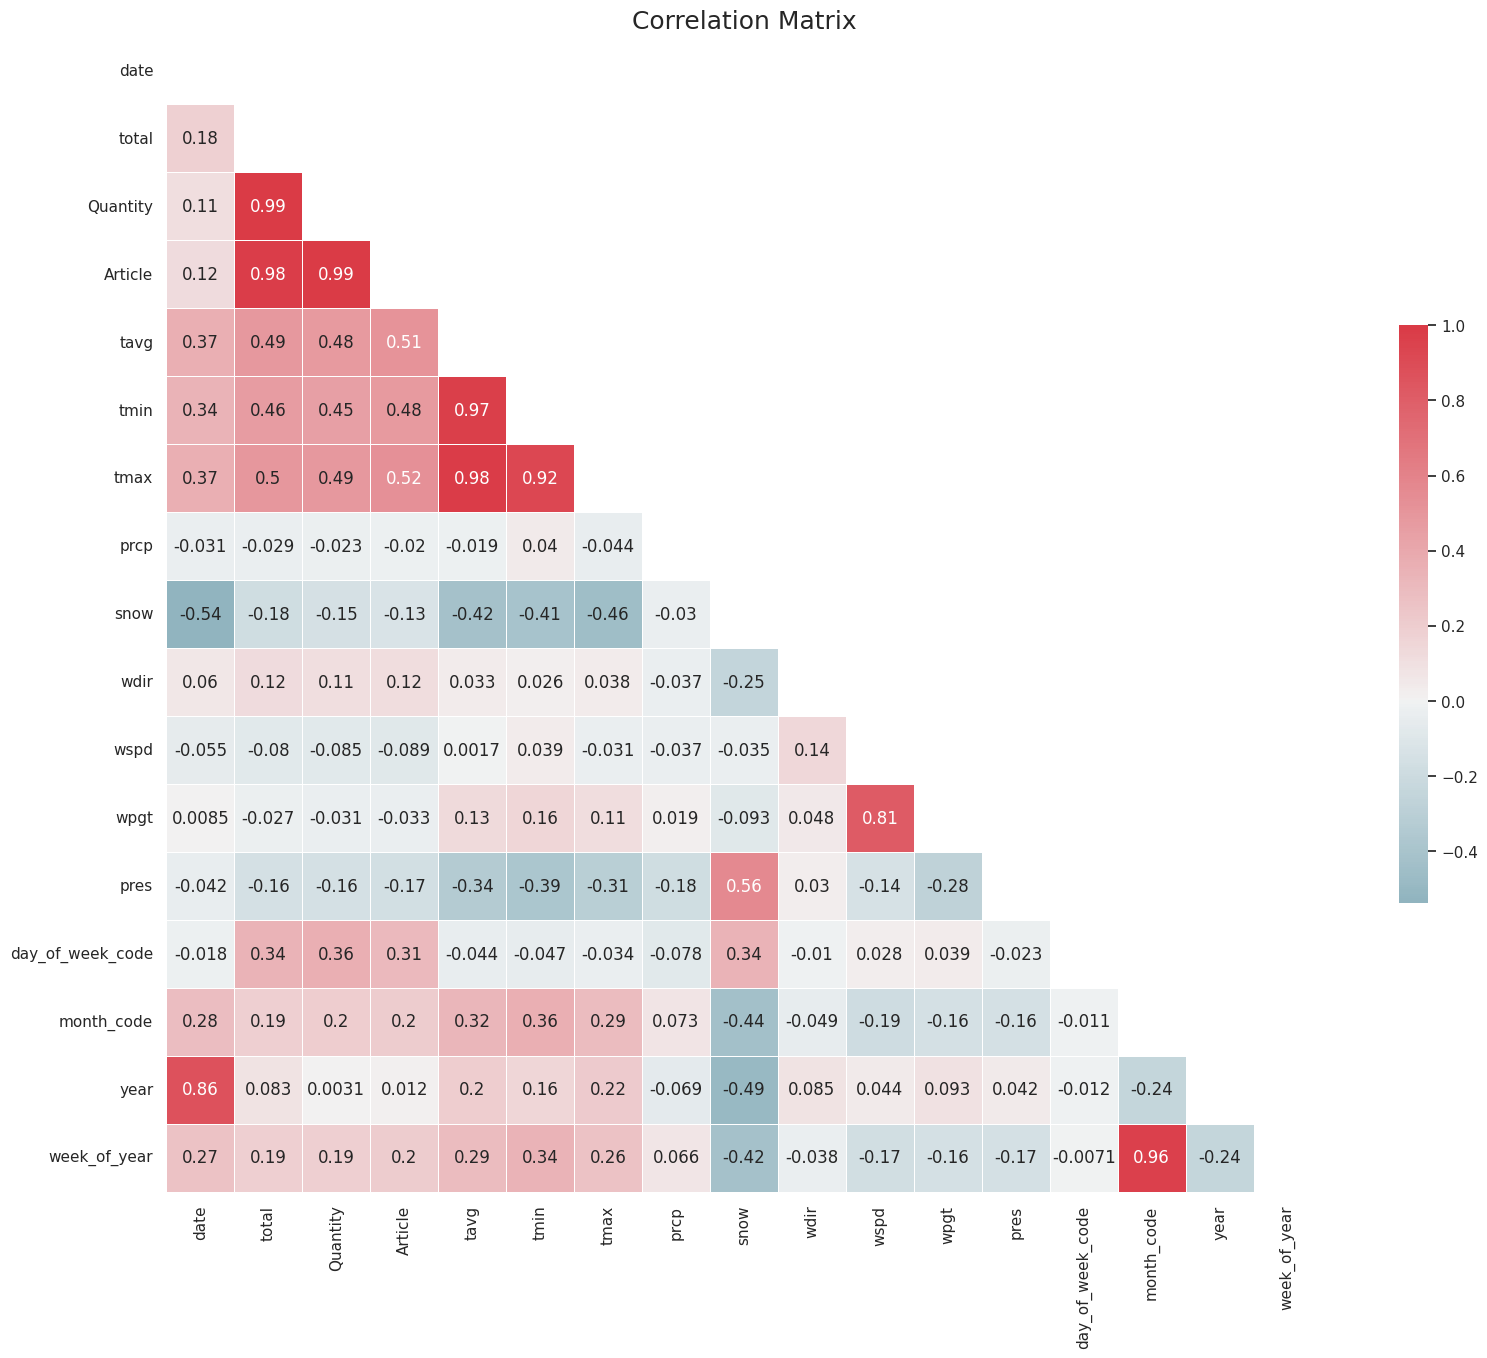

In [76]:
sns.set(style="white")

# Calculate the correlation matrix
corr = merged_data_final.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Add title
plt.title('Correlation Matrix', fontsize=18)

# Display the plot
plt.show()

In [77]:
nan_counts = merged_data_final.isna().sum()
print("NaN counts before handling:\n", nan_counts)

# Fill NaN values in the relevant columns with the mean
for column in ['snow', 'wdir', 'wspd', 'wpgt', 'pres']:
    merged_data_final[column].fillna(merged_data_final[column].mean(), inplace=True)

# Verify no NaNs are left
nan_counts_after = merged_data_final.isna().sum()
print("NaN counts after handling:\n", nan_counts_after)

NaN counts before handling:
 date                  0
total                 0
Quantity              0
Article               0
tavg                  0
tmin                  0
tmax                  0
prcp                  0
snow                585
wdir                  2
wspd                  2
wpgt                 14
pres                  2
day_of_week_code      0
month_code            0
year                  0
week_of_year          0
dtype: int64
NaN counts after handling:
 date                0
total               0
Quantity            0
Article             0
tavg                0
tmin                0
tmax                0
prcp                0
snow                0
wdir                0
wspd                0
wpgt                0
pres                0
day_of_week_code    0
month_code          0
year                0
week_of_year        0
dtype: int64


In [78]:
merged_data_final

date    total  Quantity  Article  tavg  tmin  tmax  prcp       snow  \
0   2021-01-02   987.85     581.0      365   1.3   0.5   2.7   0.8  14.733333   
1   2021-01-03  1015.20     565.0      374   0.7  -0.3   1.6   0.0  14.733333   
2   2021-01-04   461.90     315.0      210   0.0  -1.0   1.1   0.0  14.733333   
3   2021-01-05   526.10     312.0      232   0.8  -0.9   2.1   0.0  14.733333   
4   2021-01-07   544.00     310.0      215   0.2  -1.6   2.5   0.0  14.733333   
..         ...      ...       ...      ...   ...   ...   ...   ...        ...   
595 2022-09-26   695.55     401.0      293  14.8  11.8  18.3   2.8  14.733333   
596 2022-09-27   769.00     433.0      319  13.4  10.7  16.3   3.6  14.733333   
597 2022-09-28   610.70     357.0      278  14.2  11.2  19.2   4.3  14.733333   
598 2022-09-29   698.30     430.0      301  12.2   9.3  15.7  24.4  14.733333   
599 2022-09-30   795.95     503.0      341  10.2   7.0  14.6   0.0  14.733333   

      wdir  wspd  wpgt    pres  day_of_week_code  month_code  year  \
0    336.0  24.7  44.0  1010.1                 5           0  2021   
1    327.0  17.1  38.9  1012.1                 6           0  2021   
2    329.0  10.6  30.0  1011.4                 0           0  2021   
3    338.0   6.2  30.0  1012.1                 1           0  2021   
4    343.0   6.2  24.0  1017.1                 3           0  2021   
..     ...   ...   ...     ...               ...         ...   ...   
595  297.0   7.8  22.2  1011.3                 0           8  2022   
596  240.0  10.5  33.0  1008.6                 1           8  2022   
597  190.0  15.9  48.0  1003.1                 2           8  2022   
598  321.0   6.9  18.5  1003.2                 3           8  2022   
599  346.0   9.9  40.8  1011.7                 4           8  2022   

     week_of_year  
0              53  
1              53  
2               1  
3               1  
4               1  
..            ...  
595            39  
596            39  
597            39  
598            39  
599            39  

[600 rows x 17 columns]

Model

Date column is dropped since we have most of the features recorded in day of week, monthm year columns

In [79]:
# Dropping the original date column
merged_data_basemodel = merged_data_final.drop(columns=['date'])

In [80]:
merged_data_basemodel

total  Quantity  Article  tavg  tmin  tmax  prcp       snow   wdir  \
0     987.85     581.0      365   1.3   0.5   2.7   0.8  14.733333  336.0   
1    1015.20     565.0      374   0.7  -0.3   1.6   0.0  14.733333  327.0   
2     461.90     315.0      210   0.0  -1.0   1.1   0.0  14.733333  329.0   
3     526.10     312.0      232   0.8  -0.9   2.1   0.0  14.733333  338.0   
4     544.00     310.0      215   0.2  -1.6   2.5   0.0  14.733333  343.0   
..       ...       ...      ...   ...   ...   ...   ...        ...    ...   
595   695.55     401.0      293  14.8  11.8  18.3   2.8  14.733333  297.0   
596   769.00     433.0      319  13.4  10.7  16.3   3.6  14.733333  240.0   
597   610.70     357.0      278  14.2  11.2  19.2   4.3  14.733333  190.0   
598   698.30     430.0      301  12.2   9.3  15.7  24.4  14.733333  321.0   
599   795.95     503.0      341  10.2   7.0  14.6   0.0  14.733333  346.0   

     wspd  wpgt    pres  day_of_week_code  month_code  year  week_of_year  
0    24.7  44.0  1010.1                 5           0  2021            53  
1    17.1  38.9  1012.1                 6           0  2021            53  
2    10.6  30.0  1011.4                 0           0  2021             1  
3     6.2  30.0  1012.1                 1           0  2021             1  
4     6.2  24.0  1017.1                 3           0  2021             1  
..    ...   ...     ...               ...         ...   ...           ...  
595   7.8  22.2  1011.3                 0           8  2022            39  
596  10.5  33.0  1008.6                 1           8  2022            39  
597  15.9  48.0  1003.1                 2           8  2022            39  
598   6.9  18.5  1003.2                 3           8  2022            39  
599   9.9  40.8  1011.7                 4           8  2022            39  

[600 rows x 16 columns]

In [81]:
# Define features and target variable
X = merged_data_basemodel.drop(columns=['total','Quantity','Article'])
y = merged_data_basemodel['total']

In [82]:
X

tavg  tmin  tmax  prcp       snow   wdir  wspd  wpgt    pres  \
0     1.3   0.5   2.7   0.8  14.733333  336.0  24.7  44.0  1010.1   
1     0.7  -0.3   1.6   0.0  14.733333  327.0  17.1  38.9  1012.1   
2     0.0  -1.0   1.1   0.0  14.733333  329.0  10.6  30.0  1011.4   
3     0.8  -0.9   2.1   0.0  14.733333  338.0   6.2  30.0  1012.1   
4     0.2  -1.6   2.5   0.0  14.733333  343.0   6.2  24.0  1017.1   
..    ...   ...   ...   ...        ...    ...   ...   ...     ...   
595  14.8  11.8  18.3   2.8  14.733333  297.0   7.8  22.2  1011.3   
596  13.4  10.7  16.3   3.6  14.733333  240.0  10.5  33.0  1008.6   
597  14.2  11.2  19.2   4.3  14.733333  190.0  15.9  48.0  1003.1   
598  12.2   9.3  15.7  24.4  14.733333  321.0   6.9  18.5  1003.2   
599  10.2   7.0  14.6   0.0  14.733333  346.0   9.9  40.8  1011.7   

     day_of_week_code  month_code  year  week_of_year  
0                   5           0  2021            53  
1                   6           0  2021            53  
2                   0           0  2021             1  
3                   1           0  2021             1  
4                   3           0  2021             1  
..                ...         ...   ...           ...  
595                 0           8  2022            39  
596                 1           8  2022            39  
597                 2           8  2022            39  
598                 3           8  2022            39  
599                 4           8  2022            39  

[600 rows x 13 columns]

Linear Regression

RMSE: 397.23341966951034


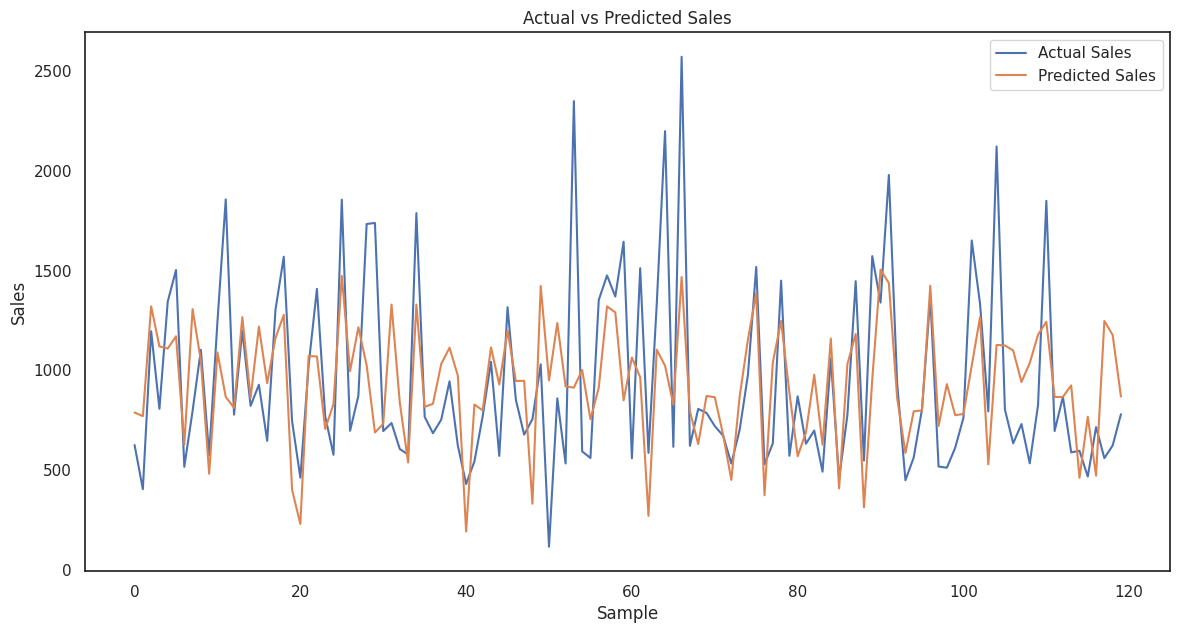

In [83]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.xlabel('Sample')
plt.ylabel('Sales')
plt.show()

SARIMAX

In [84]:
merged_data_basemodel

total  Quantity  Article  tavg  tmin  tmax  prcp       snow   wdir  \
0     987.85     581.0      365   1.3   0.5   2.7   0.8  14.733333  336.0   
1    1015.20     565.0      374   0.7  -0.3   1.6   0.0  14.733333  327.0   
2     461.90     315.0      210   0.0  -1.0   1.1   0.0  14.733333  329.0   
3     526.10     312.0      232   0.8  -0.9   2.1   0.0  14.733333  338.0   
4     544.00     310.0      215   0.2  -1.6   2.5   0.0  14.733333  343.0   
..       ...       ...      ...   ...   ...   ...   ...        ...    ...   
595   695.55     401.0      293  14.8  11.8  18.3   2.8  14.733333  297.0   
596   769.00     433.0      319  13.4  10.7  16.3   3.6  14.733333  240.0   
597   610.70     357.0      278  14.2  11.2  19.2   4.3  14.733333  190.0   
598   698.30     430.0      301  12.2   9.3  15.7  24.4  14.733333  321.0   
599   795.95     503.0      341  10.2   7.0  14.6   0.0  14.733333  346.0   

     wspd  wpgt    pres  day_of_week_code  month_code  year  week_of_year  
0    24.7  44.0  1010.1                 5           0  2021            53  
1    17.1  38.9  1012.1                 6           0  2021            53  
2    10.6  30.0  1011.4                 0           0  2021             1  
3     6.2  30.0  1012.1                 1           0  2021             1  
4     6.2  24.0  1017.1                 3           0  2021             1  
..    ...   ...     ...               ...         ...   ...           ...  
595   7.8  22.2  1011.3                 0           8  2022            39  
596  10.5  33.0  1008.6                 1           8  2022            39  
597  15.9  48.0  1003.1                 2           8  2022            39  
598   6.9  18.5  1003.2                 3           8  2022            39  
599   9.9  40.8  1011.7                 4           8  2022            39  

[600 rows x 16 columns]

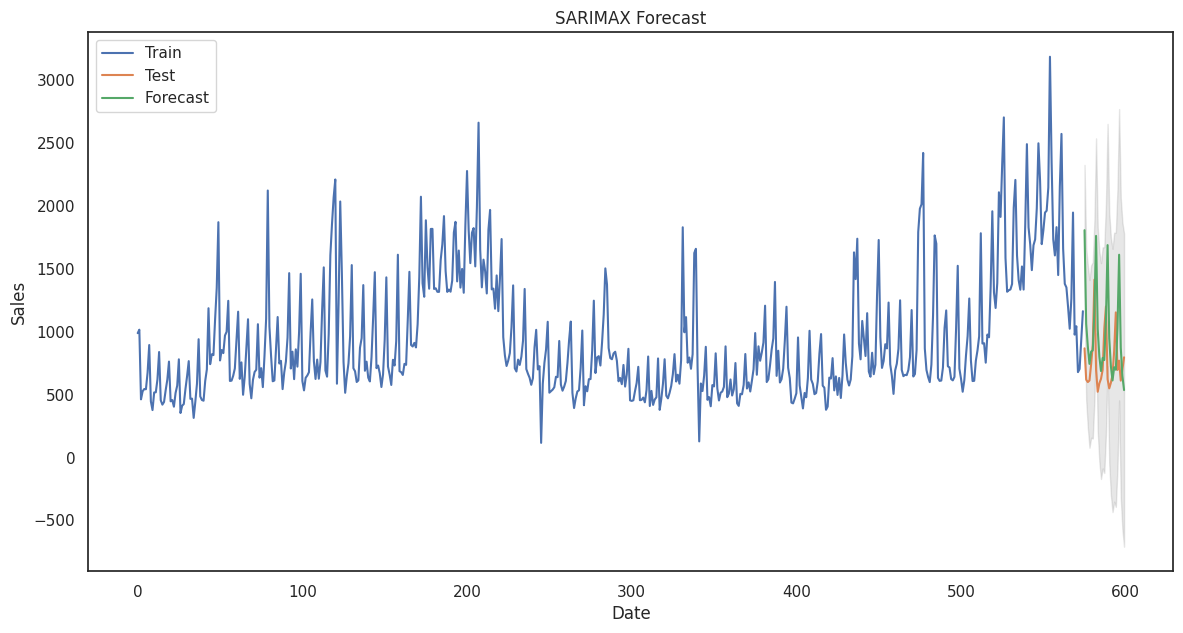

RMSE: 458.4229876507662


In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Split into train and test sets (assuming you want to forecast the last 100 days)
train = merged_data_basemodel[:-25]
test = merged_data_basemodel[-25:]

# Define the SARIMAX model
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 7)  # (P, D, Q, s)
model = SARIMAX(train['total'], order=order, seasonal_order=seasonal_order)

# Fit the SARIMAX model
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=25)

# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()

# Plotting the forecasts
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['total'], label='Train')
plt.plot(test.index, test['total'], label='Test')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean.values, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title('SARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Print RMSE
forecast_values = forecast.predicted_mean
actual_values = test['total']
rmse = np.sqrt(np.mean((forecast_values - actual_values) ** 2))
print(f"RMSE: {rmse}")

**LSTM - Sales**

LSTM model is chosen because of its ability to retain information for a long period of time and hence they work well with time series data. The data is split into training and testing sets, scaled using MinMaxScaler, and reshaped to fit the LSTM input requirements. The model architecture includes an LSTM layer with 50 units and a Dense output layer. It is compiled using the Adam optimizer and Mean Squared Error (MSE) as the loss function. The model is trained for 50 epochs with a batch size of 32. The LSTM model achieved strong performance metrics, including an R-squared of 0.979 and an RMSE of 89.834, indicating its effectiveness in forecasting sales and helping the bakery optimize production to reduce waste and meet customer demand.

In [86]:
# Compute correlation with target variable 'total'
correlation = merged_data_basemodel.corr()['total'].abs().sort_values(ascending=False)

# Select features with correlation above a threshold (e.g., 0.1)
threshold = 0.3
selected_features = correlation[correlation >= threshold].index.tolist()

# Print selected features
print("Selected Features based on Correlation with 'total':")
print(selected_features)

Selected Features based on Correlation with 'total':
['total', 'Quantity', 'Article', 'tmax', 'tavg', 'tmin', 'day_of_week_code']


In [87]:
# Split into train and test sets
train = merged_data_basemodel[:-100]
test = merged_data_basemodel[-100:]

# Scale data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['total', 'Quantity', 'Article', 'tmax', 'tavg', 'tmin', 'day_of_week_code']])
test_scaled = scaler.transform(test[['total', 'Quantity', 'Article', 'tmax', 'tavg', 'tmin', 'day_of_week_code']])

# Function to create LSTM dataset
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Create LSTM dataset
TIME_STEPS = 25  # Adjust window size here
X_train, y_train = create_dataset(train_scaled, train_scaled[:, 0], time_steps=TIME_STEPS)
X_test, y_test = create_dataset(test_scaled, test_scaled[:, 0], time_steps=TIME_STEPS)

# Reshape data for LSTM (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 7)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 7)

In [88]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11651 (45.51 KB)
Trainable params: 11651 (45.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [89]:
# Train LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)


Epoch 1/50
14/14 [==============================] - 3s 61ms/step - loss: 0.0316 - val_loss: 0.0301
Epoch 2/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0208 - val_loss: 0.0360
Epoch 3/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0162 - val_loss: 0.0284
Epoch 4/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0156 - val_loss: 0.0306
Epoch 5/50
14/14 [==============================] - 0s 16ms/step - loss: 0.0144 - val_loss: 0.0280
Epoch 6/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0141 - val_loss: 0.0280
Epoch 7/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0135 - val_loss: 0.0277
Epoch 8/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0133 - val_loss: 0.0275
Epoch 9/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0131 - val_loss: 0.0272
Epoch 10/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0129 - val_loss: 0.0267
Epoch 11/

3/3 [==============================] - 1s 6ms/step


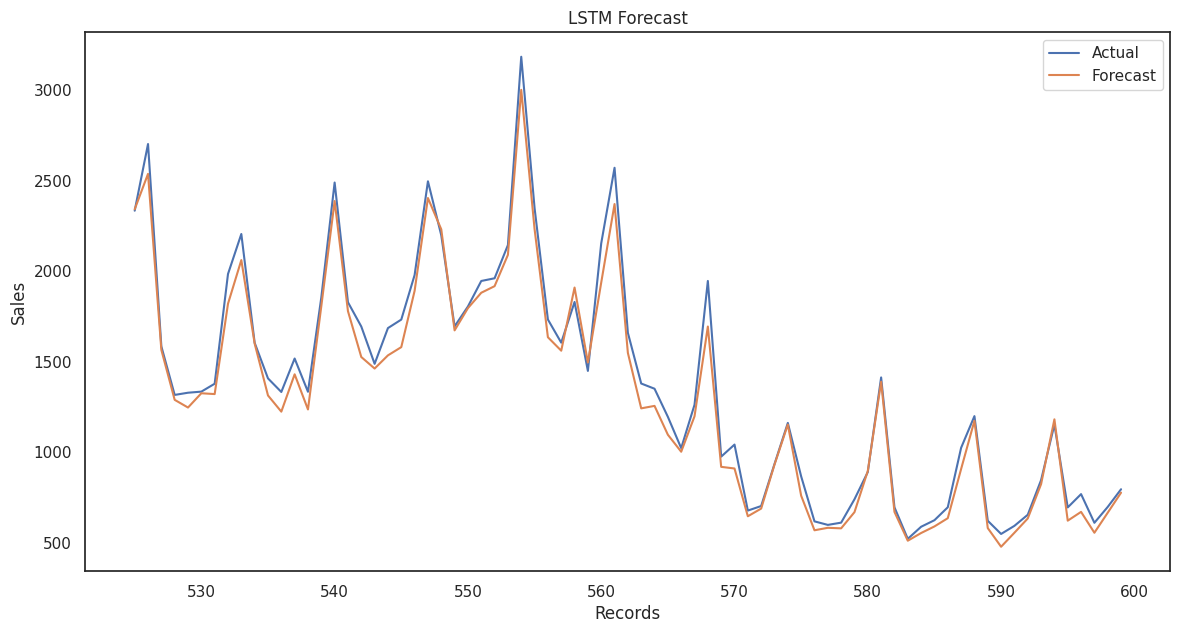

In [90]:
# Forecast with LSTM model
y_pred = model.predict(X_test)
forecast_values = scaler.inverse_transform(np.concatenate((test_scaled[TIME_STEPS:, 1:], y_pred), axis=1))[:, 0]

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(test.index[TIME_STEPS:], test['total'].iloc[TIME_STEPS:], label='Actual')
plt.plot(test.index[TIME_STEPS:], forecast_values, label='Forecast')
plt.title('LSTM Forecast')
plt.xlabel('Records')
plt.ylabel('Sales')
plt.legend()
plt.show()

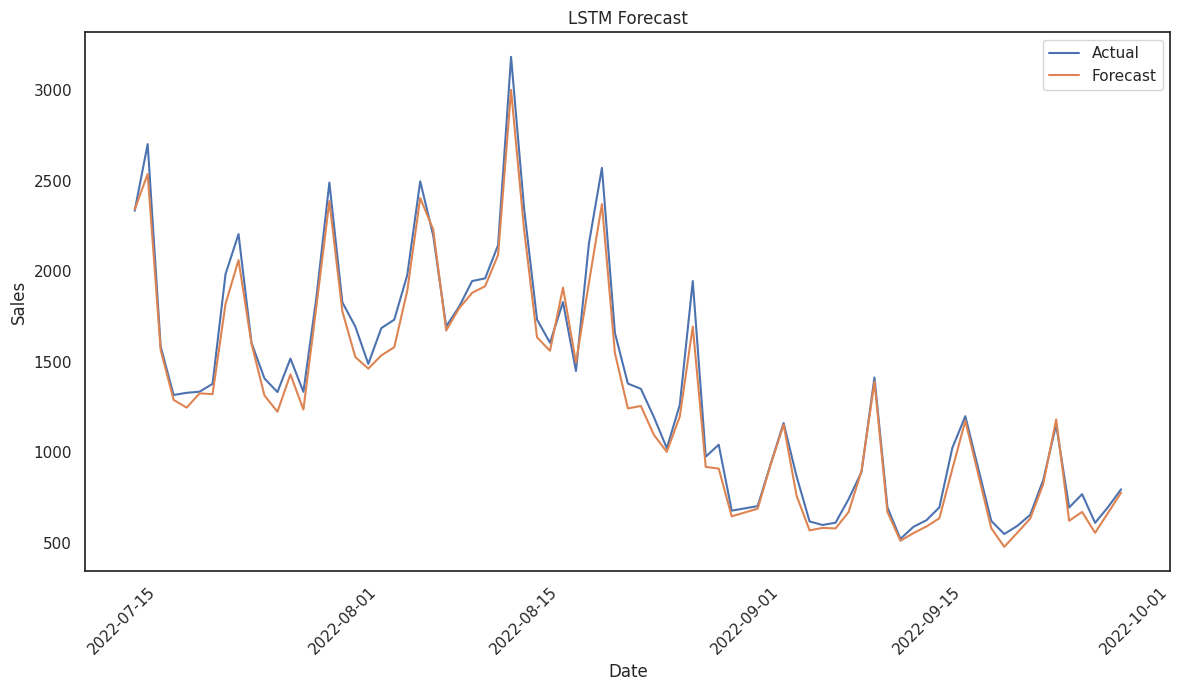

In [91]:
# Extract dates from merged_data corresponding to the test subset
test_dates = merged_data_final['date'][-100:]

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(test_dates[TIME_STEPS:], test['total'].iloc[TIME_STEPS:], label='Actual')
plt.plot(test_dates[TIME_STEPS:], forecast_values, label='Forecast')
plt.title('LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()



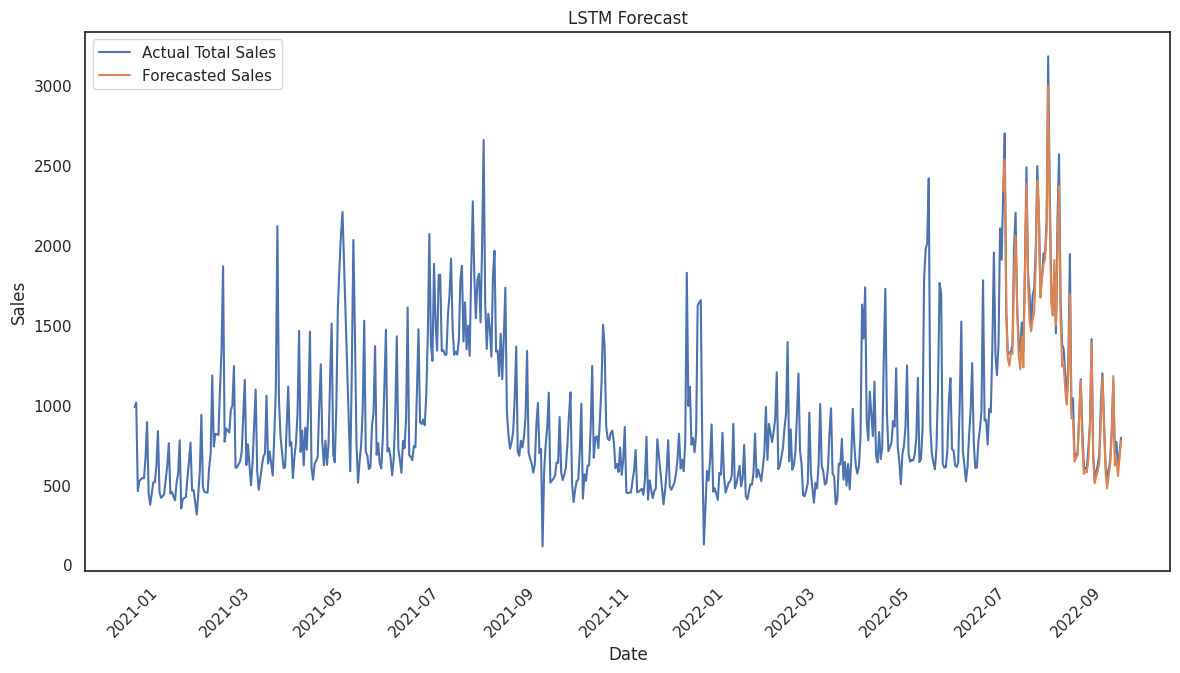

In [92]:
# Extract dates from merged_data_final corresponding to the entire dataset
all_dates = merged_data_final['date']

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(all_dates, merged_data_basemodel['total'], label='Actual Total Sales')
plt.plot(all_dates.iloc[-100:][TIME_STEPS:], forecast_values, label='Forecasted Sales')
plt.title('LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

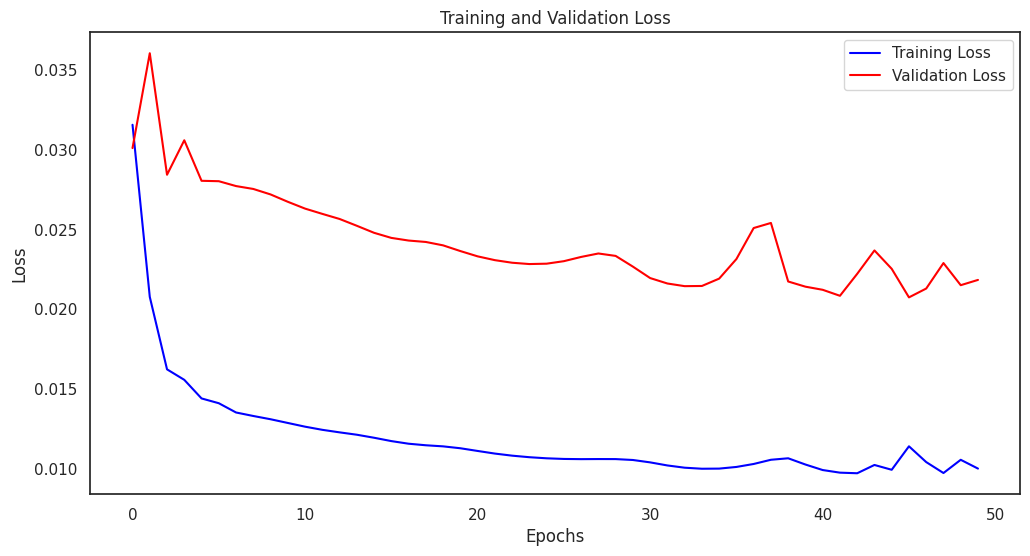

In [93]:
# Extract training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss curves
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

After one point the loss stops decreasing

In [94]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['total'].iloc[TIME_STEPS:], forecast_values))
print(f"LSTM RMSE: {rmse}")

LSTM RMSE: 89.83471151817453


In [95]:
# List out actual and predicted values
actual_values = test['total'].iloc[TIME_STEPS:].values
predicted_values = forecast_values

# Create a DataFrame to display actual and predicted values
results_df = pd.DataFrame({'Date': test.index[TIME_STEPS:], 'Actual': actual_values, 'Predicted': predicted_values})
print(results_df)


    Date   Actual    Predicted
0    525  2334.00  2341.839690
1    526  2702.15  2537.434595
2    527  1584.95  1565.525030
3    528  1316.75  1289.569428
4    529  1328.90  1247.114720
..   ...      ...          ...
70   595   695.55   622.424017
71   596   769.00   670.943683
72   597   610.70   555.709476
73   598   698.30   666.394964
74   599   795.95   777.080453

[75 rows x 3 columns]


In [96]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R2 score
r2 = r2_score(actual_values, predicted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['total'].iloc[TIME_STEPS:], forecast_values))
print(f"LSTM RMSE: {rmse}")


R2 Score: 0.9790970883397081
Mean Squared Error (MSE): 8070.27539355364
Mean Absolute Error (MAE): 70.49017528804136
LSTM RMSE: 89.83471151817453


LSTM Quantity

In [97]:
# Compute correlation with target variable 'total'
correlation = merged_data_basemodel.corr()['Quantity'].abs().sort_values(ascending=False)

# Select features with correlation above a threshold (e.g., 0.1)
threshold = 0.3
selected_features = correlation[correlation >= threshold].index.tolist()

# Print selected features
print("Selected Features based on Correlation with 'Quantity':")
print(selected_features)

Selected Features based on Correlation with 'Quantity':
['Quantity', 'Article', 'total', 'tmax', 'tavg', 'tmin', 'day_of_week_code']


In [98]:
# Scale data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['Quantity', 'Article', 'total', 'tmax', 'tavg', 'tmin', 'day_of_week_code']])
test_scaled = scaler.transform(test[['Quantity', 'Article', 'total', 'tmax', 'tavg', 'tmin', 'day_of_week_code']])

# Function to create LSTM dataset
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Create LSTM dataset
TIME_STEPS = 25  # Adjust window size here
X_train, y_train = create_dataset(train_scaled, train_scaled[:, 0], time_steps=TIME_STEPS)
X_test, y_test = create_dataset(test_scaled, test_scaled[:, 0], time_steps=TIME_STEPS)

# Reshape data for LSTM (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 7)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 7)
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Print model summary
print(model.summary())
# Train LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)
# Forecast with LSTM model
y_pred = model.predict(X_test)
forecast_values = scaler.inverse_transform(np.concatenate((test_scaled[TIME_STEPS:, 1:], y_pred), axis=1))[:, 0]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                11600     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11651 (45.51 KB)
Trainable params: 11651 (45.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
14/14 [==============================] - 3s 55ms/step - loss: 0.0515 - val_loss: 0.0780
Epoch 2/50
14/14 [==============================] - 0s 16ms/step - loss: 0.0205 - val_loss: 0.0272
Epoch 3/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0207 - val_loss: 0.0384
Epoch 4/50
14/14 [==============================] - 0s 20ms/step - loss: 0.0172 - val_loss: 0.0298
Epoch 5/50
14

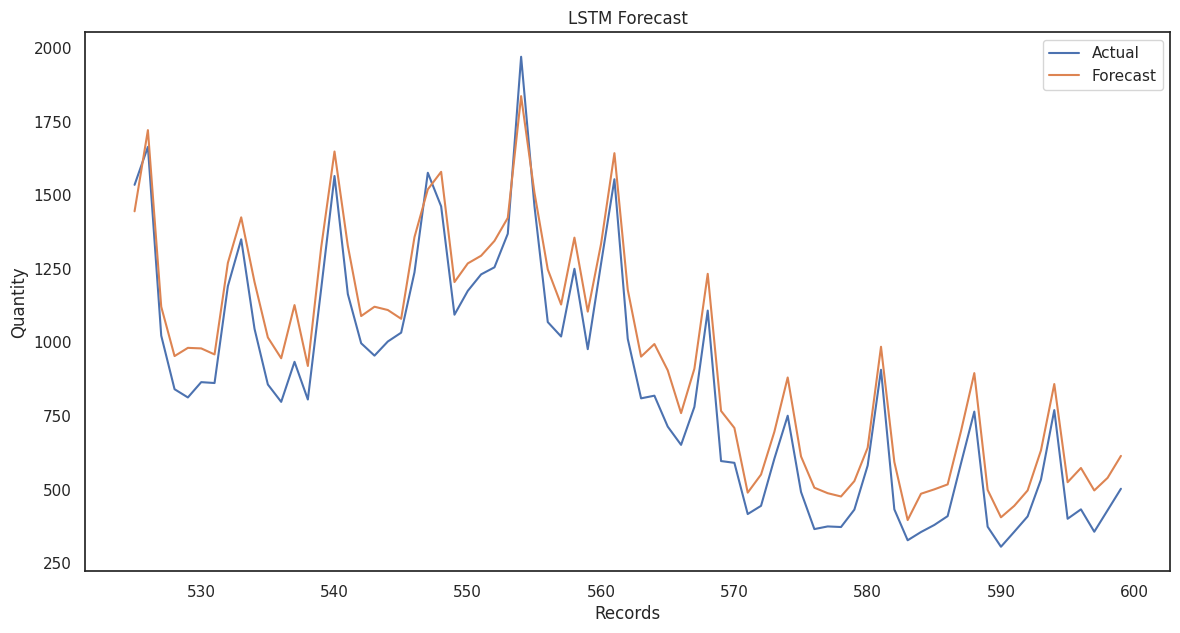

In [99]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(test.index[TIME_STEPS:], test['Quantity'].iloc[TIME_STEPS:], label='Actual')
plt.plot(test.index[TIME_STEPS:], forecast_values, label='Forecast')
plt.title('LSTM Forecast')
plt.xlabel('Records')
plt.ylabel('Quantity')
plt.legend()
plt.show()

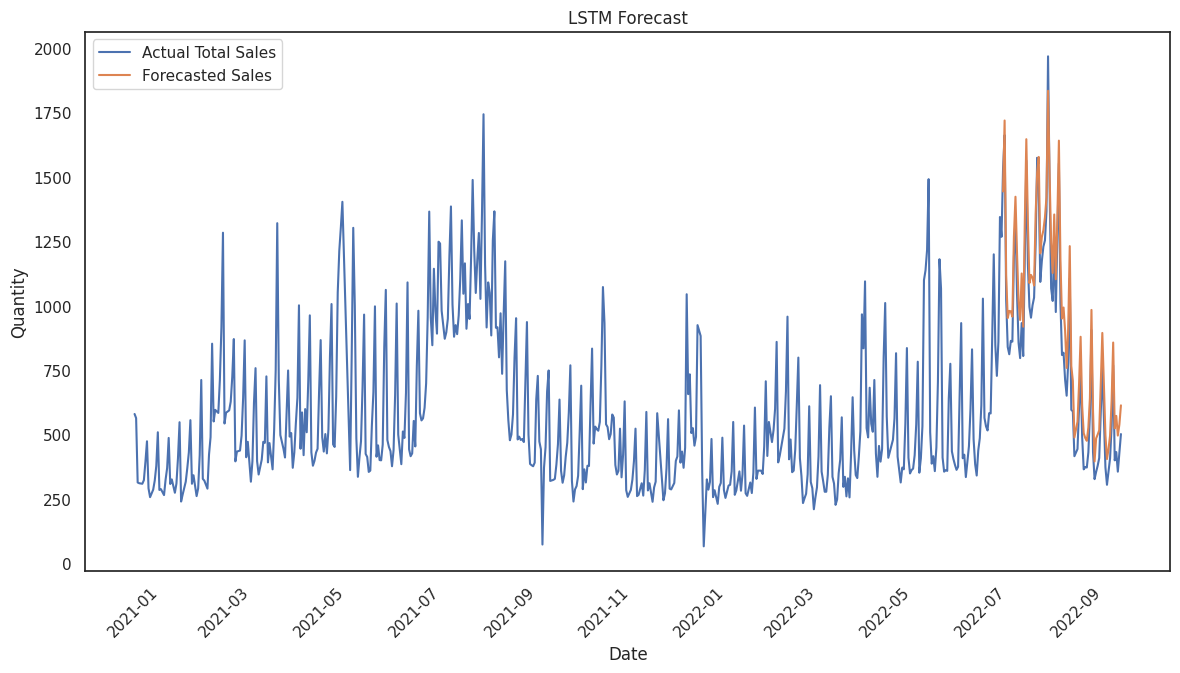

In [100]:
# Extract dates from merged_data_final corresponding to the entire dataset
all_dates = merged_data_final['date']

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(all_dates, merged_data_basemodel['Quantity'], label='Actual Total Sales')
plt.plot(all_dates.iloc[-100:][TIME_STEPS:], forecast_values, label='Forecasted Sales')
plt.title('LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [101]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Quantity'].iloc[TIME_STEPS:], forecast_values))
print(f"LSTM RMSE: {rmse}")

LSTM RMSE: 118.60535100289766


In [102]:
# List out actual and predicted values
actual_values = test['Quantity'].iloc[TIME_STEPS:].values
predicted_values = forecast_values

# Create a DataFrame to display actual and predicted values
results_df = pd.DataFrame({'Date': test.index[TIME_STEPS:], 'Actual': actual_values, 'Predicted': predicted_values})
print(results_df)


    Date  Actual    Predicted
0    525  1535.0  1445.157603
1    526  1664.0  1720.789123
2    527  1023.0  1121.104329
3    528   841.0   953.490566
4    529   813.0   981.426193
..   ...     ...          ...
70   595   401.0   525.144284
71   596   433.0   573.566038
72   597   357.0   497.208657
73   598   430.0   540.043285
74   599   503.0   614.538291

[75 rows x 3 columns]


In [103]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R2 score
r2 = r2_score(actual_values, predicted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Quantity'].iloc[TIME_STEPS:], forecast_values))
print(f"LSTM RMSE: {rmse}")


R2 Score: 0.9095976975942
Mean Squared Error (MSE): 14067.229286520556
Mean Absolute Error (MAE): 113.43319274879767
LSTM RMSE: 118.60535100289766


##### Recommendations
1.	Adjust Production for Weekends and Warm Days:
Increase production on weekends and days with higher temperatures to meet higher demand and reduce the risk of stockouts.
2.	Utilize LSTM Model for Daily Forecasting:
Implement the LSTM model to forecast daily sales and adjust production based on weather forecasts to minimize waste and ensure product availability.
